In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Preprocessing

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('drive/MyDrive/data0.csv', index_col= 0)

In [ ]:
df.head()

,Paper_ID,Title,Authors,Abstract,Year,Domains,all_access_id,outbound,inbound,s2,journal,venue
0,77490025,State of external ocular muscles in strabismus...,Pen'kov # Ma # #$# Konstantinovskaia # Ke ...,NaN,1975.0,Medicine,# #$# # #$# # #$# # #$# # #$# 2426173123 ...,NaN,NaN,https://api.semanticscholar.org/CorpusID:77490025,Oftalmologicheskiĭ zhurnal,NaN
1,77490084,Management of uterine fibromyoma,Landau # IaM # #$# Karpushin # Vp # #$#,NaN,1972.0,Medicine,# #$# # #$# # #$# # #$# # #$# 2425602342 ...,NaN,NaN,https://api.semanticscholar.org/CorpusID:77490084,NaN,NaN
2,77490191,Nature of the reflex excitation of the spinal ...,Popov # Sv # #$# Gaĭvoronskiĭ # Gi # #$#,NaN,1977.0,Medicine,# #$# # #$# # #$# # #$# # #$# 2437424934 ...,NaN,NaN,https://api.semanticscholar.org/CorpusID:77490191,Zhurnal Nevropatologii I Psikhiatrii Imeni S S...,NaN
3,77490289,[Radioimmunoassay of serum gastrin and its pre...,Jin # Js # #$#,NaN,1980.0,Medicine,# #$# # #$# # #$# # #$# # #$# 2430030388 ...,NaN,NaN,https://api.semanticscholar.org/CorpusID:77490289,Chinese journal of internal medicine,NaN
4,77490322,Sodium amytal in treatment of anxiety states; ...,Cline # Wb # #$#,NaN,1952.0,Medicine,# #$# # #$# # #$# # #$# # #$# 2437852910 ...,NaN,NaN,https://api.semanticscholar.org/CorpusID:77490322,Diseases of the nervous system,NaN


In [ ]:
df.shape

(1366661, 12)

## Step 1 remove papers according to years

In [ ]:
from tqdm.notebook import tqdm
authors_count = []

for i, row in tqdm(df.iterrows()):
  authors = row['Authors']
  if type(authors)==float:
    authors_count.append(0)
    continue
  n_auth = len(authors.split('#$#'))
  authors_count.append(n_auth)

0it [00:00, ?it/s]

In [ ]:
df['N_Authors'] = authors_count
df.head()

,Paper_ID,Title,Authors,Abstract,Year,Domains,all_access_id,outbound,inbound,s2,journal,venue,N_Authors
0,77490025,State of external ocular muscles in strabismus...,Pen'kov # Ma # #$# Konstantinovskaia # Ke ...,NaN,1975.0,Medicine,# #$# # #$# # #$# # #$# # #$# 2426173123 ...,NaN,NaN,https://api.semanticscholar.org/CorpusID:77490025,Oftalmologicheskiĭ zhurnal,NaN,4
1,77490084,Management of uterine fibromyoma,Landau # IaM # #$# Karpushin # Vp # #$#,NaN,1972.0,Medicine,# #$# # #$# # #$# # #$# # #$# 2425602342 ...,NaN,NaN,https://api.semanticscholar.org/CorpusID:77490084,NaN,NaN,3
2,77490191,Nature of the reflex excitation of the spinal ...,Popov # Sv # #$# Gaĭvoronskiĭ # Gi # #$#,NaN,1977.0,Medicine,# #$# # #$# # #$# # #$# # #$# 2437424934 ...,NaN,NaN,https://api.semanticscholar.org/CorpusID:77490191,Zhurnal Nevropatologii I Psikhiatrii Imeni S S...,NaN,3
3,77490289,[Radioimmunoassay of serum gastrin and its pre...,Jin # Js # #$#,NaN,1980.0,Medicine,# #$# # #$# # #$# # #$# # #$# 2430030388 ...,NaN,NaN,https://api.semanticscholar.org/CorpusID:77490289,Chinese journal of internal medicine,NaN,2
4,77490322,Sodium amytal in treatment of anxiety states; ...,Cline # Wb # #$#,NaN,1952.0,Medicine,# #$# # #$# # #$# # #$# # #$# 2437852910 ...,NaN,NaN,https://api.semanticscholar.org/CorpusID:77490322,Diseases of the nervous system,NaN,2


In [ ]:
df.isnull().sum()

Paper_ID               0
Title                  0
Authors             7832
Abstract          600536
Year               27516
Domains            60609
all_access_id          0
outbound         1127434
inbound           936642
s2                     0
journal           415384
venue             875301
N_Authors              0
dtype: int64

In [ ]:
years = df['Year'].value_counts()
years

2015.0    59691
2014.0    58418
2016.0    58062
2013.0    57483
2019.0    55958
          ...  
1577.0        1
1656.0        1
2114.0        1
1591.0        1
1651.0        1
Name: Year, Length: 322, dtype: int64

In [ ]:
df['Year'].value_counts().describe()

count      322.000000
mean      4158.835404
std      11449.620676
min          1.000000
25%          2.000000
50%         56.000000
75%        689.500000
max      59691.000000
Name: Year, dtype: float64

In [ ]:
years = years[years.values>689]
years

2015.0    59691
2014.0    58418
2016.0    58062
2013.0    57483
2019.0    55958
          ...  
1945.0      759
1939.0      731
1938.0      729
1941.0      696
1936.0      695
Name: Year, Length: 81, dtype: int64

In [ ]:
dyears = dict(years)
y,v = dyears.keys(), dyears.values()

<BarContainer object of 81 artists>

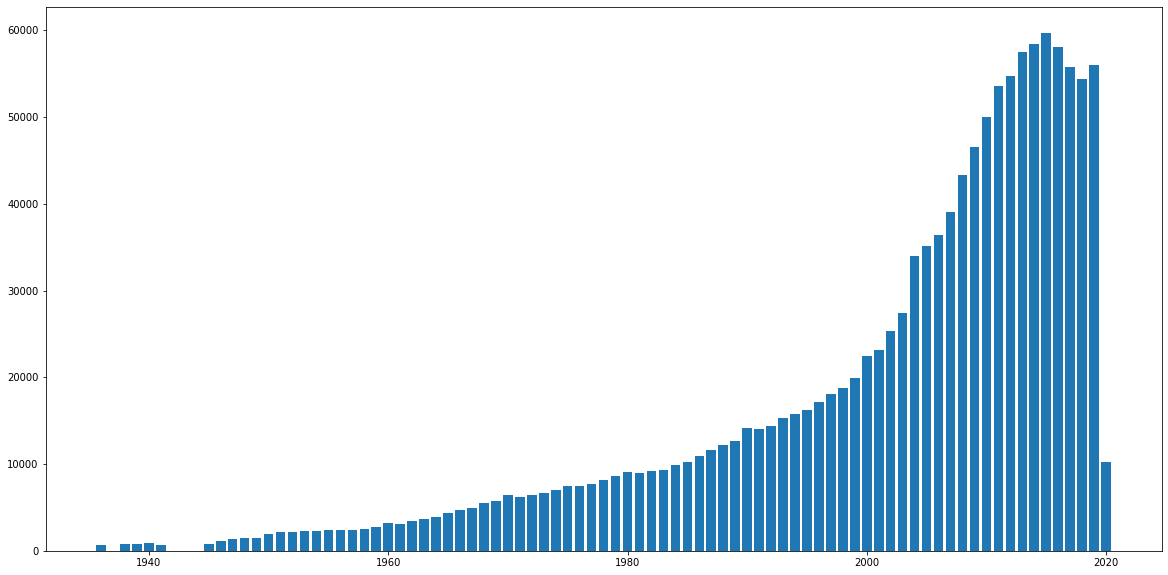

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,10))
plt.bar(y,v)

In [ ]:
df.shape

(1366661, 13)

In [ ]:
df1 = df[df['Year'].isin(dyears.keys())]
df1.shape

(1316753, 13)

## Step 2 remove paper according to authors and citations

In [ ]:
df2 = df1.dropna(subset = ['inbound', 'outbound'], how = 'any')
df2.shape

(138371, 13)

In [ ]:
citation_count = []
for i,row in tqdm(df2.iterrows()):
  citation = row['inbound']
  n_citation = len(citation.split('#$#'))
  citation_count.append(n_citation)

df2['N_Citation'] = citation_count

0it [00:00, ?it/s]

<ipython-input-43-16b7b6783ba8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['N_Citation'] = citation_count


In [ ]:
df2.head()

,Paper_ID,Title,Authors,Abstract,Year,Domains,all_access_id,outbound,inbound,s2,journal,venue,N_Authors,N_Citation
108,94550656,The Approximate Analysis of Nonlinear Behavior...,Mehdi # Bayat # #$# M. # Shahidi # #$# A...,NaN,2010.0,Chemistry,# #$# # #$# # #$# # #$# # #$# 1898439082 ...,16827035 #$# 123547559 #$# 121037939 #$# 32723...,111338160 #$# 123223115 #$# 122710809 #$# 1224...,https://api.semanticscholar.org/CorpusID:94550656,International Journal of Physical Sciences,NaN,5,20
112,94551239,Scanning probe memories – Technology and appli...,C. David # Wright # #$# Mustafa M. # Aziz ...,Abstract Scanning probe-based memories have de...,2011.0,Chemistry,# #$# # #$# # #$# # #$# 10.1016/j.cap.2010...,108611510 #$# 60055472,115517644 #$# 119233534 #$# 52967309,https://api.semanticscholar.org/CorpusID:94551239,Current Applied Physics,NaN,5,3
115,94551546,Gd(III) ion-chelated supramolecular assemblies...,Yu # Zhao # #$# Shun # Duan # #$# Bingra...,An intricate polymer complex can carry genes t...,2015.0,Materials Science,# #$# # #$# # #$# # #$# 10.1038/am.2015.67...,4683185 #$# 82875295 #$# 98119828 #$# 28185772...,543091 #$# 102670965,https://api.semanticscholar.org/CorpusID:94551546,Npg Asia Materials,NaN,7,2
148,94556881,The analysis of the influence phosphorus compo...,A. W. Bydałek # #$# P. # Schlafka # #$# A...,NaN,2004.0,Chemistry,# #$# # #$# # #$# # #$# # #$# 822361964 #$#,98669634 #$# 138111016,139593766 #$# 137830203,https://api.semanticscholar.org/CorpusID:94556881,NaN,NaN,4,2
220,18980380,Distributionally Robust Counterpart in Markov ...,Pengqian # Yu # #$# Huan # Xu # #$#,This technical note studies Markov decision pr...,2016.0,Mathematics #$# Computer Science,1501.07418 #$# # #$# # #$# # #$# 10.1109/TA...,7229756 #$# 57464058 #$# 9166388 #$# 10603007 ...,18980380 #$# 2557260 #$# 202130625 #$# 1228782...,https://api.semanticscholar.org/CorpusID:18980380,IEEE Transactions on Automatic Control,IEEE Transactions on Automatic Control,3,18


In [ ]:
df2 = df2[df2['N_Citation']<=100]
df2.shape

(135782, 14)

In [ ]:
df3 = df2[df2['N_Authors']<20]
df3.shape

(134972, 14)

In [ ]:
df3.isnull().sum()

Paper_ID             0
Title                0
Authors              0
Abstract         11126
Year                 0
Domains           3910
all_access_id        0
outbound             0
inbound              0
s2                   0
journal          20389
venue            39746
N_Authors            0
N_Citation           0
dtype: int64

In [ ]:
df3.to_csv('/content/drive/MyDrive/new_data.csv', index = True)

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/new_data.csv' , index_col = 0)
df3.head()

NameError: ignored

## Get the dbpedia entities

In [ ]:
!pip install spacy-dbpedia-spotlight

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 KB 2.7 MB/s eta 0:00:00
  Created wheel for spacy-dbpedia-spotlight: filename=spacy_dbpedia_spotlight-0.2.5-py3-none-any.whl size=12374 sha256=3a1c3aa3f62c2d4b887d9d55e2816d75113b5884d285473445c05354e2f89a02
  Stored in directory: /root/.cache/pip/wheels/f1/4c/61/c238aa752c0526571027070ce766a02f3db53eaa0fd4faab1a
Successfully built spacy-dbpedia-spotlight


In [ ]:
df3 = df3.iloc[104000:]
df3.shape

(30972, 14)

In [ ]:
df3.head()

,Paper_ID,Title,Authors,Abstract,Year,Domains,all_access_id,outbound,inbound,s2,journal,venue,N_Authors,N_Citation
1049638,73355120,Contribution of bradykinin to the cardioprotec...,Laine J. Murphey # #$# Douglas E. Vaughan #...,"Bradykinin, through its B 2 receptor, stimulat...",2003.0,Medicine,# #$# # #$# # #$# # #$# 10.1016/S1520-765X...,83187388 #$# 28282001 #$# 41719557 #$# 6236353...,214958276 #$# 7275689 #$# 5225525 #$# 8230389 ...,https://api.semanticscholar.org/CorpusID:73355120,European Heart Journal Supplements,NaN,4,10
1049673,45320240,Patterned Poly(dopamine) Films for Enhanced Ce...,Xi # Chen # #$# Christina # Cortez-Jugo #...,Engineered materials that promote cell adhesio...,2017.0,Chemistry #$# Medicine,# #$# # #$# # #$# 28095687 #$# 10.1021/acs....,206861569 #$# 39299795 #$# 6706970 #$# 2671717...,213181972 #$# 24894366 #$# 215347699 #$# 53226...,https://api.semanticscholar.org/CorpusID:45320240,Bioconjugate chemistry,Bioconjugate chemistry,8,5
1049689,45323101,Maternal urological injuries associated with v...,S. A. Kattan # #$#,Injury to the maternal lower urinary tract is ...,2006.0,Medicine,# #$# # #$# # #$# 9241541 #$# 10.1007/BF025...,40907743 #$# 33927084 #$# 36672322 #$# 4623954...,43074045 #$# 29613887 #$# 11678145 #$# 26063346,https://api.semanticscholar.org/CorpusID:45323101,International Urology and Nephrology,International Urology and Nephrology,2,4
1049693,45323687,Microbead dynamics on Quartz Crystal Microbala...,S.K. # Ghosh # #$# V.P. # Ostanin # #$# ...,The application of the Quartz Crystal Microbal...,2009.0,Physics,# #$# # #$# # #$# # #$# 10.1109/ULTSYM.200...,197200198 #$# 42002987 #$# 95249032 #$# 730787...,25980762,https://api.semanticscholar.org/CorpusID:45323687,2009 IEEE International Ultrasonics Symposium,2009 IEEE International Ultrasonics Symposium,4,1
1049736,45328777,Treatment trends of rheumatoid arthritis in Ja...,Nobuyuki # Miyasaka # #$#,NaN,2011.0,Medicine,# #$# # #$# # #$# # #$# 10.2492/inflammreg...,33491934 #$# 34484362 #$# 40327923 #$# 7728206...,45328777 #$# 73420337 #$# 28142524 #$# 11673808,https://api.semanticscholar.org/CorpusID:45328777,Inflammation and Regeneration,NaN,2,4


In [ ]:
import spacy
import spacy_dbpedia_spotlight
from tqdm.notebook import tqdm
import json

In [ ]:
concepts = {}

In [ ]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('dbpedia_spotlight')

In [ ]:
from prompt_toolkit.key_binding.key_bindings import abstractproperty
for i, row in tqdm(df3.iterrows()):

  entities = []
  properties = []
  p_id = row['Paper_ID']
  title = row['Title']
  abstract = row['Abstract']

  if str(abstract) == 'nan':
    text = title
  else:
    text = abstract + ' ' + title

  doc = nlp(text)

  for ent in doc.ents:
    entities.append(ent.text)


  concepts[p_id] = {'entities': entities, 'properties': properties}

  if i%10000==0:
    with open('/content/drive/MyDrive/concepts3.json', 'w') as file:
      json.dump(concepts , file)
    print(f'file saved: {i}')

0it [00:00, ?it/s]

file saved: 1090000
file saved: 1110000
file saved: 1160000
file saved: 1170000
file saved: 1280000


In [ ]:
len(concepts)

30972

In [ ]:
with open('/content/drive/MyDrive/concepts2.json', 'w') as file:
      json.dump(concepts , file)

In [ ]:
with open('/content/drive/MyDrive/concepts2.json', 'r') as file:
  data = json.load(file)

In [ ]:
with open('/content/drive/MyDrive/concepts3.json', 'w') as file:
  json.dump(concepts , file)

In [ ]:
with open('/content/drive/MyDrive/concepts3.json', 'r') as file:
  data = json.load(file)

In [ ]:
!pip install rdflib
!pip install SPARQLWrapper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 500.3/500.3 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 KB 4.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### code for entities properties

In [ ]:
from SPARQLWrapper import SPARQLWrapper, JSON, N3
from pprint import pprint

In [ ]:
sparql = SPARQLWrapper('https://dbpedia.org/sparql')
sparql.setQuery('''
SELECT ?object
WHERE {dbr:Barack_Obama dbo:wikiPageWikiLink ?object .}''')

sparql.setReturnFormat(JSON)
qres = sparql.query().convert()


for result in qres['results']['bindings']:
  print(result['object'])
  # lang, value = result['object']['xml:lang'], result['object']['value']
  # if lang == 'en':
  #   print(value)

In [ ]:
concepts

{77490025: {'entities': ['strabismus'], 'properties': []}}

In [ ]:
import spacy_dbpedia_spotlight

nlp = spacy.load('en_core_web_sm')
# add the pipeline stage
nlp.add_pipe('dbpedia_spotlight')
# get the document
doc = nlp('When looking for recently published scientific papers, a researcher\
usually focuses on the topics related to her/his scientific interests.\
The task of a recommender system is to recommender system provide a list of unseen\
papers that match these topics. The core idea of this paper is to leverage the latent topics of interest in the publications of the researchers,\
and to take advantage of the social structure of the researchers (relations among researchers in the same field) as reliable sources\
of knowledge to improve the recommendation effectiveness. In\
particular, we introduce a hybrid approach to the task of scientific\
papers recommendation, which combines content analysis based on\
probabilistic topic modeling and ideas from collaborative filtering\
based on a relevance-based language model. We conducted an experimental study on DBLP, which demonstrates that our approach\
is promising.')
# see the entities
print('Entities', [(ent.text, ent.label_, ent.kb_id_) for ent in doc.ents])
# inspect the raw data from DBpedia spotlight
print(doc.ents[0]._.dbpedia_raw_result)

Entities [('recommender system', 'DBPEDIA_ENT', 'http://dbpedia.org/resource/Recommender_system'), ('recommender system', 'DBPEDIA_ENT', 'http://dbpedia.org/resource/Recommender_system'), ('hybrid', 'DBPEDIA_ENT', 'http://dbpedia.org/resource/Hybrid_electric_vehicle'), ('content analysis', 'DBPEDIA_ENT', 'http://dbpedia.org/resource/Content_analysis'), ('topic modeling', 'DBPEDIA_ENT', 'http://dbpedia.org/resource/Topic_model'), ('language model', 'DBPEDIA_ENT', 'http://dbpedia.org/resource/Language_model'), ('DBLP', 'DBPEDIA_ENT', 'http://dbpedia.org/resource/DBLP')]
{'@URI': 'http://dbpedia.org/resource/Recommender_system', '@support': '302', '@types': '', '@surfaceForm': 'recommender system', '@offset': '151', '@similarityScore': '1.0', '@percentageOfSecondRank': '0.0'}


## Step 3 remove papers with entites less than 4

In [ ]:
import pandas as pd
from tqdm.notebook import tqdm
import json
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/new_data.csv', index_col = 0)

In [ ]:
with open('/content/drive/MyDrive/concepts2.json', 'r') as file:
  data1 = json.load(file)

In [ ]:
with open('/content/drive/MyDrive/vedant_concepts.json', 'r') as file:
  data2 = json.load(file)

In [ ]:
with open('/content/drive/MyDrive/nishant_conecpts.json', 'r') as file:
  data3 = json.load(file)

In [ ]:
with open('/content/drive/MyDrive/concepts3.json', 'r') as file:
  data4 = json.load(file)

In [ ]:
final_data1 = {}
datadict = [data1, data2, data3, data4]

for d in datadict:
  for key, value in tqdm(d.items()):
    final_data1[key] = value

print(len(final_data1))

  0%|          | 0/34074 [00:00<?, ?it/s]

  0%|          | 0/40000 [00:00<?, ?it/s]

  0%|          | 0/30000 [00:00<?, ?it/s]

  0%|          | 0/30972 [00:00<?, ?it/s]

134972


In [ ]:
final_data2 = {}
for key, value in tqdm(final_data1.items()):
  entities = value['entities']
  entities = [*set(entities)]
  entities = [ele for ele in entities if len(ele)>1]

  value['entities'] = entities
  final_data2[key] = value


  0%|          | 0/134972 [00:00<?, ?it/s]

In [ ]:
with open('/content/drive/MyDrive/final_entities.json', 'w') as file:
  json.dump(final_data2, file)

In [ ]:
df2 = pd.DataFrame(columns = ['Paper_ID', 'N_Entities'])
df2.head()

,Paper_ID,N_Entities


In [ ]:
for key,value in tqdm(final_data2.items()):
  row = {'Paper_ID':key, 'N_Entities':len(value['entities'])}
  df2 = df2.append(row, ignore_index = True)

In [ ]:
df2['Paper_ID']= df2['Paper_ID'].astype('str')
df2.head()

In [ ]:
df2.info()

In [ ]:
df1.info()

In [ ]:
df1['Paper_ID'] = df1['Paper_ID'].astype('str')

In [ ]:
df3 = df1.merge(df2, on = 'Paper_ID')
print(df1.shape, df2.shape, df3.shape)

In [ ]:
df3.head()

,Paper_ID,Title,Authors,Abstract,Year,Domains,all_access_id,outbound,inbound,s2,journal,venue,N_Authors,N_Citation,N_Entities
0,94550656,The Approximate Analysis of Nonlinear Behavior...,Mehdi # Bayat # #$# M. # Shahidi # #$# A...,NaN,2010.0,Chemistry,# #$# # #$# # #$# # #$# # #$# 1898439082 ...,16827035 #$# 123547559 #$# 121037939 #$# 32723...,111338160 #$# 123223115 #$# 122710809 #$# 1224...,https://api.semanticscholar.org/CorpusID:94550656,International Journal of Physical Sciences,NaN,5,20,1
1,94551239,Scanning probe memories – Technology and appli...,C. David # Wright # #$# Mustafa M. # Aziz ...,Abstract Scanning probe-based memories have de...,2011.0,Chemistry,# #$# # #$# # #$# # #$# 10.1016/j.cap.2010...,108611510 #$# 60055472,115517644 #$# 119233534 #$# 52967309,https://api.semanticscholar.org/CorpusID:94551239,Current Applied Physics,NaN,5,3,5
2,94551546,Gd(III) ion-chelated supramolecular assemblies...,Yu # Zhao # #$# Shun # Duan # #$# Bingra...,An intricate polymer complex can carry genes t...,2015.0,Materials Science,# #$# # #$# # #$# # #$# 10.1038/am.2015.67...,4683185 #$# 82875295 #$# 98119828 #$# 28185772...,543091 #$# 102670965,https://api.semanticscholar.org/CorpusID:94551546,Npg Asia Materials,NaN,7,2,15
3,94556881,The analysis of the influence phosphorus compo...,A. W. Bydałek # #$# P. # Schlafka # #$# A...,NaN,2004.0,Chemistry,# #$# # #$# # #$# # #$# # #$# 822361964 #$#,98669634 #$# 138111016,139593766 #$# 137830203,https://api.semanticscholar.org/CorpusID:94556881,NaN,NaN,4,2,1
4,18980380,Distributionally Robust Counterpart in Markov ...,Pengqian # Yu # #$# Huan # Xu # #$#,This technical note studies Markov decision pr...,2016.0,Mathematics #$# Computer Science,1501.07418 #$# # #$# # #$# # #$# 10.1109/TA...,7229756 #$# 57464058 #$# 9166388 #$# 10603007 ...,18980380 #$# 2557260 #$# 202130625 #$# 1228782...,https://api.semanticscholar.org/CorpusID:18980380,IEEE Transactions on Automatic Control,IEEE Transactions on Automatic Control,3,18,3


In [ ]:
v = df3['N_Entities'].value_counts()
v = dict(v)
key, value = list(v.keys()), np.array(list(v.values()))
key, value = zip(*sorted(zip(key, value), key = lambda x: x[0]))
key, value = list(key), np.array(value)

In [ ]:
print('Check Percentage Data')
data_percentage = value/df3.shape[0]
cdf = np.cumsum(data_percentage)
print(len(cdf), len(key))

In [ ]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot(key, cdf)
plt.show()

In [ ]:
cdf[key.index(6)]

In [ ]:
df4 = df3[df3['N_Entities']>4]
print(df3.shape, df4.shape)

(134972, 15) (110163, 15)


In [ ]:
df3.to_csv('/content/drive/MyDrive/NofilterEntity.csv', index = True)

In [ ]:
df4.to_csv('/content/drive/MyDrive/FiteredEntity.csv', index = True)

In [ ]:
df3 = pd.read_csv('/content/drive/MyDrive/NofilterEntity.csv', index_col = 0)
df3.head()

,Paper_ID,Title,Authors,Abstract,Year,Domains,all_access_id,outbound,inbound,s2,journal,venue,N_Authors,N_Citation,N_Entities
0,94550656,The Approximate Analysis of Nonlinear Behavior...,Mehdi # Bayat # #$# M. # Shahidi # #$# A...,NaN,2010.0,Chemistry,# #$# # #$# # #$# # #$# # #$# 1898439082 ...,16827035 #$# 123547559 #$# 121037939 #$# 32723...,111338160 #$# 123223115 #$# 122710809 #$# 1224...,https://api.semanticscholar.org/CorpusID:94550656,International Journal of Physical Sciences,NaN,5,20,1
1,94551239,Scanning probe memories – Technology and appli...,C. David # Wright # #$# Mustafa M. # Aziz ...,Abstract Scanning probe-based memories have de...,2011.0,Chemistry,# #$# # #$# # #$# # #$# 10.1016/j.cap.2010...,108611510 #$# 60055472,115517644 #$# 119233534 #$# 52967309,https://api.semanticscholar.org/CorpusID:94551239,Current Applied Physics,NaN,5,3,5
2,94551546,Gd(III) ion-chelated supramolecular assemblies...,Yu # Zhao # #$# Shun # Duan # #$# Bingra...,An intricate polymer complex can carry genes t...,2015.0,Materials Science,# #$# # #$# # #$# # #$# 10.1038/am.2015.67...,4683185 #$# 82875295 #$# 98119828 #$# 28185772...,543091 #$# 102670965,https://api.semanticscholar.org/CorpusID:94551546,Npg Asia Materials,NaN,7,2,15
3,94556881,The analysis of the influence phosphorus compo...,A. W. Bydałek # #$# P. # Schlafka # #$# A...,NaN,2004.0,Chemistry,# #$# # #$# # #$# # #$# # #$# 822361964 #$#,98669634 #$# 138111016,139593766 #$# 137830203,https://api.semanticscholar.org/CorpusID:94556881,NaN,NaN,4,2,1
4,18980380,Distributionally Robust Counterpart in Markov ...,Pengqian # Yu # #$# Huan # Xu # #$#,This technical note studies Markov decision pr...,2016.0,Mathematics #$# Computer Science,1501.07418 #$# # #$# # #$# # #$# 10.1109/TA...,7229756 #$# 57464058 #$# 9166388 #$# 10603007 ...,18980380 #$# 2557260 #$# 202130625 #$# 1228782...,https://api.semanticscholar.org/CorpusID:18980380,IEEE Transactions on Automatic Control,IEEE Transactions on Automatic Control,3,18,3


In [ ]:
df4 = df3[df3['N_Entities']>2]
print(df3.shape, df4.shape)

(134972, 15) (122824, 15)


In [ ]:
df4.to_csv('/content/drive/MyDrive/FiteredEntity_v2.csv', index = True)

## utils

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/FiteredEntity.csv', index_col = 0)
df.shape

(110163, 15)

In [ ]:
from collections import Counter
from tqdm.notebook import tqdm
paper_count = dict(Counter(df['Paper_ID'].values))

In [ ]:
for i,row in tqdm(df.iterrows()):
  inbound = row['inbound'].split('#$#')
  for p in inbound:
    try:
      pid = int(p.strip())
      paper_count[pid]+=1
    except:
      continue

0it [00:00, ?it/s]

In [ ]:
intersection = []
for key,value in paper_count.items():
  if value>1:
    intersection.append(int(key))

In [ ]:
df2 = df[df['Paper_ID'].isin(intersection)]

In [ ]:
df2.shape

(8137, 15)

In [ ]:
df2.to_csv('/content/drive/MyDrive/FilteredInboundIDs.csv', index = True)

## Create Graph

In [ ]:
!pip install dgl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import json
import dgl
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/FilteredInboundIDs.csv', index_col = 0)
df.head()

,Paper_ID,Title,Authors,Abstract,Year,Domains,all_access_id,outbound,inbound,s2,journal,venue,N_Authors,N_Citation,N_Entities
38,199668943,3D Human Pose Estimation under limited supervi...,Rahul # Mitra # #$# Nitesh B. Gundavarapu ...,Estimating 3D human pose from monocular images...,2019.0,Computer Science,1908.05293 #$# # #$# # #$# # #$# # #$# 296...,206592419 #$# 2087262 #$# 84843959 #$# 1219233...,209854462,https://api.semanticscholar.org/CorpusID:19966...,ArXiv,ArXiv,7,1,9
48,2872418,Switch from θ to σ replication of bacteriophag...,Magdalena # Narajczyk # #$# Sylwia # Barań...,Bacteriophage λ genome is one of the classical...,2007.0,Biology,# #$# # #$# # #$# # #$# 10.1007/s00438-007...,42862721 #$# 86557658 #$# 42062280 #$# 1100376...,34020068,https://api.semanticscholar.org/CorpusID:2872418,Molecular Genetics and Genomics,Molecular Genetics and Genomics,5,1,17
72,116984815,Connections between various subclasses of plan...,Saurabh # Porwal # #$# K. # Vijaya # #$#...,The purpose of the present paper is to establi...,2015.0,Mathematics,# #$# # #$# # #$# # #$# 10.1007/s13370-014...,15400210 #$# 123233843 #$# 31058385 #$# 115799...,116984815,https://api.semanticscholar.org/CorpusID:11698...,Afrika Matematika,NaN,4,1,7
74,164945171,Biological activities of a garlic–Cirsium seti...,Eric Banan‐Mwine Daliri # #$# Sun‐Il # Choi...,"In this study, we investigated the antioxidant...",2019.0,Medicine #$# Chemistry,# #$# # #$# PMC6593477 #$# 31289650 #$# 10.1...,83450108 #$# 95654747 #$# 6922513 #$# 20019599...,164945171 #$# 215382559,https://api.semanticscholar.org/CorpusID:16494...,Food science & nutrition,Food science & nutrition,12,2,16
143,8330818,First DNA Barcode Reference Library for the Id...,Juan # Díaz # #$# Gabriela Vanina Villanova...,Valid fish species identification is essential...,2016.0,Biology #$# Medicine,# #$# # #$# PMC4956254 #$# 27442116 #$# 10.1...,6517747 #$# 3905370 #$# 3894046 #$# 15141910 #...,201756545 #$# 46980399 #$# 25042084 #$# 517195...,https://api.semanticscholar.org/CorpusID:8330818,PLoS ONE,PLoS ONE,8,17,21


In [ ]:
df.shape

(8137, 15)

### Indexing

In [ ]:
paper_id = df['Paper_ID'].values
pid_to_idx = {}
idx = 0
for ele in tqdm(paper_id):
  pid_to_idx[str(ele)] = idx
  idx+=1

  0%|          | 0/8137 [00:00<?, ?it/s]

In [ ]:
with open('/content/drive/MyDrive/pid_to_idx.json', 'w') as file:
  json.dump(pid_to_idx, file)

In [ ]:
with open('/content/drive/MyDrive/final_entities.json', 'r') as file:
  entities = json.load(file)

In [ ]:
inbounds = df['inbound'].values
l_pids = len(paper_id)

In [ ]:
def give_uv(df, pid_idx):
  u, v, edge = [], [], []
  for i,row in tqdm(df.iterrows()):
    pid = row['Paper_ID']
    cites = row['inbound'].split('#$#')
    for c in cites:
      try:
        idx = pid_idx[c.strip()]
        idx2 = pid_idx[str(pid)]
        u.append(idx2)
        v.append(idx)
        edge.append(str(idx)+str(idx2))
        edge.append(str(idx2)+str(idx))
      except:
        continue
  return u,v, edge

u,v,edges = give_uv(df, pid_to_idx)

0it [00:00, ?it/s]

In [ ]:
def give_uv_context(l_pids, paper_id, entities):
  u,v,edges = [],[],[]
  for i in tqdm(range(l_pids)):
    pid = str(paper_id[i])
    set1 = set(entities[pid]['entities'])
    for j in range(i+1, l_pids):
      pid2 = str(paper_id[j])
      set2 = set(entities[pid2]['entities'])
      idx1, idx2 = pid_to_idx[pid], pid_to_idx[pid2]
      set3 = set2.intersection(set1)
      if len(set3)>4:
        u.append(idx1)
        v.append(idx2)
        edges.append(str(idx1)+str(idx2))
        u.append(idx2)
        v.append(idx1)
        edges.append(str(idx2)+str(idx1))

  return u,v,edges


def give_uv_cite_con(df, pid_idx, entities,u,v,edges):
  for i,row in tqdm(df.iterrows()):
    pid = row['Paper_ID']
    cites = row['inbound'].split('#$#')
    for c in cites:
      try:
        idx1 = pid_idx[c.strip()]
        idx2 = pid_idx[str(pid)]
      except:
        continue
      # if idx1 == idx2:
      #   continue

      if str(idx1)+str(idx2) not in edges:
        set1 = set(entities[c.strip()]['entities'])
        set2 = set(entities[str(pid)]['entities'])
        set3 = set1.intersection(set2)
        if len(set3)>=0:
          u.append(idx1)
          v.append(idx2)
          edges.append(str(idx1)+str(idx2))
  return u,v,edges

u,v, edges = give_uv_context(l_pids, paper_id, entities)
print(len(u))
u2,v2, edges2 = give_uv_cite_con(df, pid_to_idx, entities, u,v,edges)
print(len(u))

  0%|          | 0/8137 [00:00<?, ?it/s]

5076


0it [00:00, ?it/s]

5315


In [ ]:
len(u2)

2462

In [ ]:
for i in tqdm(range(l_pids)):
  pid = str(paper_id[i])
  set1 = set(entities[pid]['entities'])
  for j in range(i+1, l_pids):
    pid2 = str(paper_id[j])
    set2 = set(entities[pid2]['entities'])
    idx1, idx2 = pid_to_idx[pid], pid_to_idx[pid2]
    if str(idx1)+str(idx2) in edges:
      continue
    elif str(idx2)+str(idx1) in edges:
      continue
    else:
      set3 = set1.intersection(set2)
      if len(set3)>3:
        u.append(idx1)
        v.append(idx2)
        edges.append(str(idx1)+str(idx2))
        edges.append(str(idx2)+str(idx1))


  0%|          | 0/8137 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
print(len(u), len(v), len(edges))

23925 23925 23925


In [ ]:
len(u)

8178

In [ ]:
send = {'u':u, 'v':v}
with open('/content/drive/MyDrive/final_uv_v3.json', 'w') as file:
  json.dump(send, file)

### calculate node features

In [ ]:
!pip install transformers
!wget -O scibert_uncased.tar https://s3-us-west-2.amazonaws.com/ai2-s2-research/scibert/huggingface_pytorch/scibert_scivocab_uncased.tar
!tar -xvf scibert_uncased.tar
import torch
from transformers import BertTokenizer, BertModel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 75.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 76.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 21.5 MB/s eta 0:00:00
--2023-04-15 12:52:35--  https://s3-us-west-2.amazonaws.com/ai2-s2-research/scibert/huggingface_pytorch/scibert_scivocab_uncased.tar
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.92.212.144, 52.92.177.240, 52.92.153.80, ...
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.92.212.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 442460160 (422M) [application/x-tar]
Saving to: ‘scibert_uncased.tar’

scibert_uncased.tar 100%[===================>] 421.96M  35.5MB/s    in 13s     

2023-04-15 12:52:49 (33.0 MB/s) - ‘scibert_uncased.tar’ saved [442460160/442460160]

scibert_scivocab_

In [ ]:
model_version = 'scibert_scivocab_uncased'
do_lower_case = True
tokenizer = BertTokenizer.from_pretrained(model_version, do_lower_case=do_lower_case)

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'RobertaTokenizer'. 
The class this function is called from is 'BertTokenizer'.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/FilteredInboundIDs.csv', index_col = 0)
df.head()

,Paper_ID,Title,Authors,Abstract,Year,Domains,all_access_id,outbound,inbound,s2,journal,venue,N_Authors,N_Citation,N_Entities
38,199668943,3D Human Pose Estimation under limited supervi...,Rahul # Mitra # #$# Nitesh B. Gundavarapu ...,Estimating 3D human pose from monocular images...,2019.0,Computer Science,1908.05293 #$# # #$# # #$# # #$# # #$# 296...,206592419 #$# 2087262 #$# 84843959 #$# 1219233...,209854462,https://api.semanticscholar.org/CorpusID:19966...,ArXiv,ArXiv,7,1,9
48,2872418,Switch from θ to σ replication of bacteriophag...,Magdalena # Narajczyk # #$# Sylwia # Barań...,Bacteriophage λ genome is one of the classical...,2007.0,Biology,# #$# # #$# # #$# # #$# 10.1007/s00438-007...,42862721 #$# 86557658 #$# 42062280 #$# 1100376...,34020068,https://api.semanticscholar.org/CorpusID:2872418,Molecular Genetics and Genomics,Molecular Genetics and Genomics,5,1,17
72,116984815,Connections between various subclasses of plan...,Saurabh # Porwal # #$# K. # Vijaya # #$#...,The purpose of the present paper is to establi...,2015.0,Mathematics,# #$# # #$# # #$# # #$# 10.1007/s13370-014...,15400210 #$# 123233843 #$# 31058385 #$# 115799...,116984815,https://api.semanticscholar.org/CorpusID:11698...,Afrika Matematika,NaN,4,1,7
74,164945171,Biological activities of a garlic–Cirsium seti...,Eric Banan‐Mwine Daliri # #$# Sun‐Il # Choi...,"In this study, we investigated the antioxidant...",2019.0,Medicine #$# Chemistry,# #$# # #$# PMC6593477 #$# 31289650 #$# 10.1...,83450108 #$# 95654747 #$# 6922513 #$# 20019599...,164945171 #$# 215382559,https://api.semanticscholar.org/CorpusID:16494...,Food science & nutrition,Food science & nutrition,12,2,16
143,8330818,First DNA Barcode Reference Library for the Id...,Juan # Díaz # #$# Gabriela Vanina Villanova...,Valid fish species identification is essential...,2016.0,Biology #$# Medicine,# #$# # #$# PMC4956254 #$# 27442116 #$# 10.1...,6517747 #$# 3905370 #$# 3894046 #$# 15141910 #...,201756545 #$# 46980399 #$# 25042084 #$# 517195...,https://api.semanticscholar.org/CorpusID:8330818,PLoS ONE,PLoS ONE,8,17,21


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8137 entries, 38 to 134943
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Paper_ID       8137 non-null   int64  
 1   Title          8137 non-null   object 
 2   Authors        8137 non-null   object 
 3   Abstract       8081 non-null   object 
 4   Year           8137 non-null   float64
 5   Domains        8090 non-null   object 
 6   all_access_id  8137 non-null   object 
 7   outbound       8137 non-null   object 
 8   inbound        8137 non-null   object 
 9   s2             8137 non-null   object 
 10  journal        7392 non-null   object 
 11  venue          6188 non-null   object 
 12  N_Authors      8137 non-null   int64  
 13  N_Citation     8137 non-null   int64  
 14  N_Entities     8137 non-null   int64  
dtypes: float64(1), int64(4), object(10)
memory usage: 1017.1+ KB


In [ ]:
def embed_text(text):

  input_ids = tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text))
  return input_ids

In [ ]:
max_len = -1*float('inf')
text_len = []
domain_types = {}
index = 0
for i, row in tqdm(df.iterrows()):
  pid = row['Paper_ID']
  title = row['Title']
  abstract = str(row['Abstract'])
  if abstract=='nan':
    abstract = ''
  domains = row['Domains']
  if str(domains)!='nan':
    domains = [d.strip() for d in row['Domains'].split('#$#')]
    for d in domains:
      if d not in domain_types:
        domain_types[d]=index
        index+=1

  text = title+abstract
  embedding = embed_text(text)
  text_len.append(len(embedding))
  max_len = max(len(text),max_len)

0it [00:00, ?it/s]

10091


<BarContainer object of 668 artists>

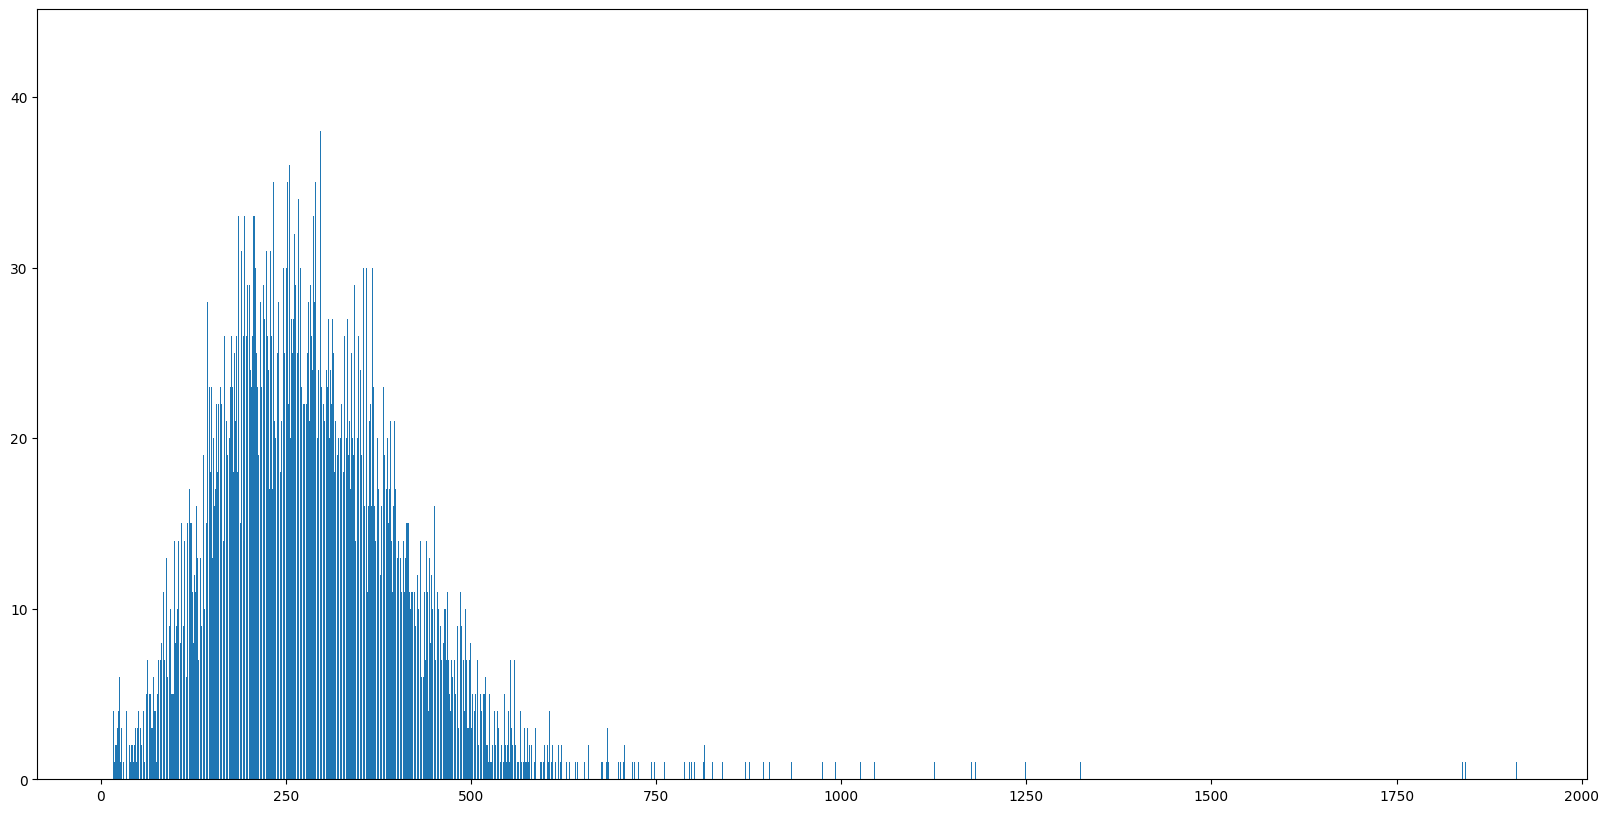

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

print(max_len)
text_dist = dict(Counter(text_len))
s, f = text_dist.keys(), text_dist.values()
plt.figure(figsize = (20,10))
plt.bar(s,f)

In [ ]:
key, value = zip(*sorted(zip(s, f), key = lambda x: x[0]))
key, value = list(key), np.array(value)

In [ ]:
print('Check Percentage Data')
data_percentage = value/df.shape[0]
print(max(data_percentage))
cdf = np.cumsum(data_percentage)
print(len(cdf), len(key))

Check Percentage Data
0.005284502888042276
668 668


In [ ]:
cdf[key.index(300)]

0.5902666830527219

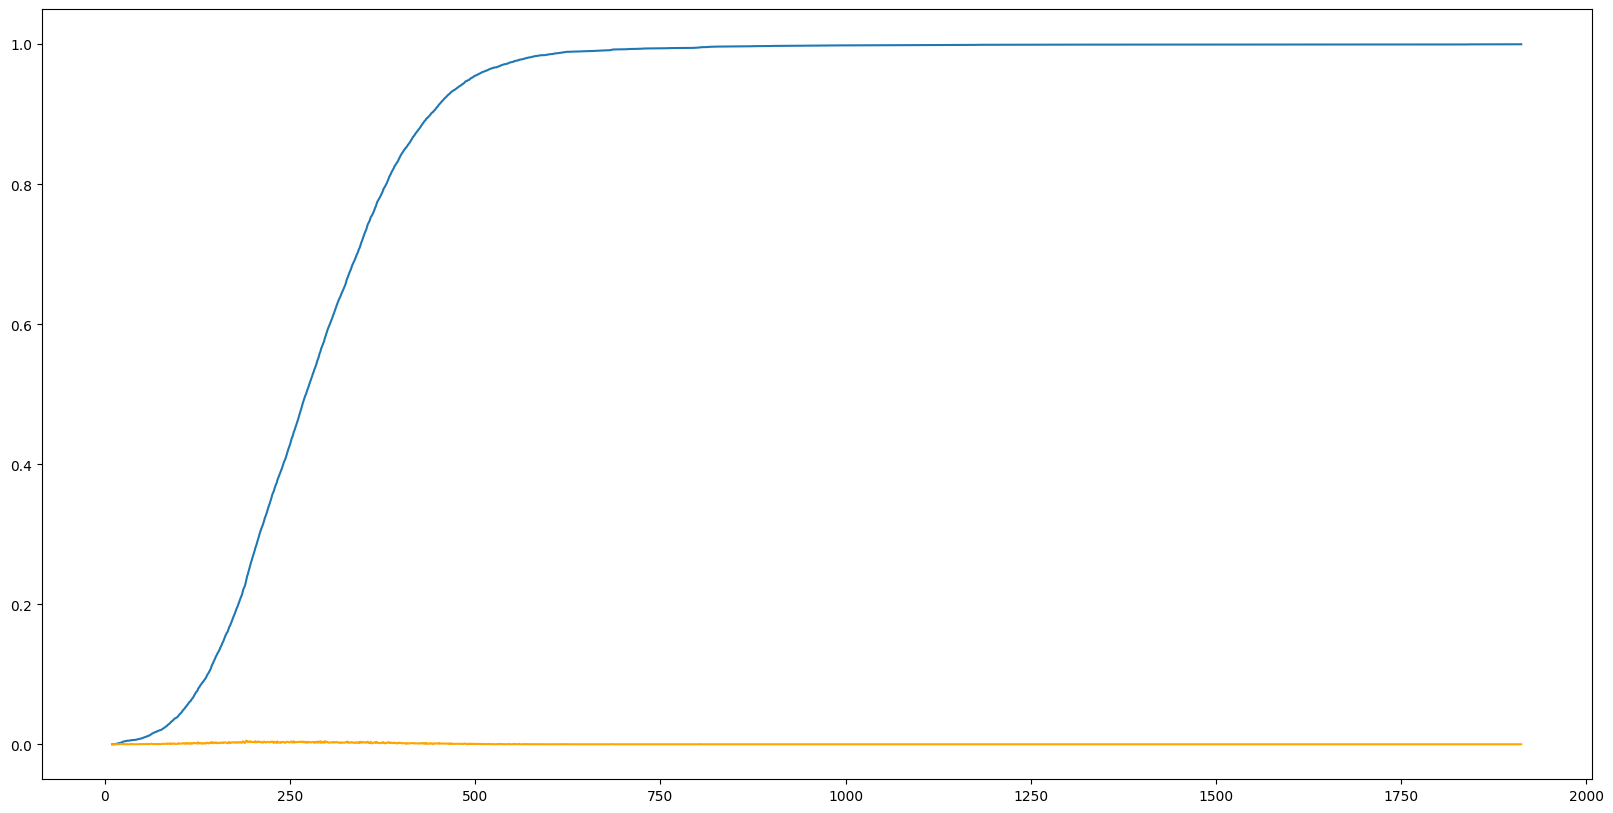

In [ ]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot(key, cdf)
plt.plot(key,data_percentage, color='orange')
plt.show()

In [ ]:
len(domain_types)

19

In [ ]:
domain_types['ukn']=19
domain_types

{'Computer Science': 0,
 'Biology': 1,
 'Mathematics': 2,
 'Medicine': 3,
 'Chemistry': 4,
 'Engineering': 5,
 'Physics': 6,
 'Geology': 7,
 'Materials Science': 8,
 'Political Science': 9,
 'Psychology': 10,
 'Economics': 11,
 'Philosophy': 12,
 'Geography': 13,
 'Business': 14,
 'Environmental Science': 15,
 'Sociology': 16,
 'History': 17,
 'Art': 18,
 'ukn': 19}

In [ ]:
with open('/content/drive/MyDrive/domain_types.json', 'w') as file:
  json.dump(domain_types, file)

In [ ]:
with open('/content/drive/MyDrive/pid_to_idx.json', 'r') as file:
  pid_idx = json.load(file)

In [ ]:
with open('/content/drive/MyDrive/domain_types.json', 'r') as file:
  domain_types = json.load(file)

In [ ]:
def get_features(df, pid_idx):
  features = np.zeros((8137, 300))
  for i, row in tqdm(df.iterrows()):
    pid = str(row['Paper_ID'])
    idx = pid_idx[pid]
    title = row['Title']
    abstract = str(row['Abstract'])

    if abstract=='nan':
      abstract = ''

    text = title + abstract
    embedding = embed_text(text)
    embed_len = len(embedding)
    if embed_len>280:
      embed_len = 280
      features[idx][:embed_len] = embedding[:embed_len]
    else:
      features[idx][:embed_len] = embedding

    domains = row['Domains']
    if str(domains)!='nan':
      domains = [d.strip() for d in row['Domains'].split('#$#')]

      for d in domains:
        didx = domain_types[d]
        features[idx][280+didx] = 1
  return features

node_features = get_features(df, pid_idx)

0it [00:00, ?it/s]

In [ ]:
len(node_features)

8137

In [ ]:
len(node_features[-1])

300

In [ ]:
features2 = [list(feat) for feat in node_features]

In [ ]:
with open('/content/drive/MyDrive/node_featuresv2.json', 'w') as file:
  json.dump(features2, file)

### create final uv

In [ ]:
with open('/content/drive/MyDrive/gaurav_uv.json', 'r') as file:
  edges1 = json.load(file)

with open('/content/drive/MyDrive/nishant_uv.json', 'r') as file:
  edges2 = json.load(file)

with open('/content/drive/MyDrive/vedant_uv.json', 'r') as file:
  edges3 = json.load(file)

In [ ]:
print(len(edges1['u'][:-38]), len(edges2['u'][2881:]), len(edges3['u'][2881:]))
print('Total Edges')
print(len(edges1['u'])+len(edges2['u'][2881:])+len(edges3['u'][2881:]))

8140 4159 1322
Total Edges
13659


In [ ]:
u,v = edges1['u'][:-38], edges1['v'][:-38]

for e in [edges2, edges3]:
  u_, v_ = e['u'][2881:], e['v'][2881:]
  u.extend(u_)
  v.extend(v_)

print(len(u), len(v))

13621 13621


In [ ]:
with open('/content/drive/MyDrive/final_uv.json', 'w') as file:
  json.dump({'u':u, 'v': v},file)

### Create graph

In [ ]:
import torch

In [ ]:
with open('/content/drive/MyDrive/final_uv_v3.json', 'r') as file:
  edges = json.load(file)

u,v = edges['u'], edges['v']

In [ ]:
u,v = zip(*(sorted(zip(u,v), key = lambda x: x[0])))

In [ ]:
with open('/content/drive/MyDrive/node_featuresv2.json', 'r') as file:
  node_features = json.load(file)

In [ ]:
count = 0
for i in range(len(u)):
  if u[i]==v[i]:
    count+=1
print(count)

2144


In [ ]:
print(min(u), max(u), min(v), max(v))

2 8131 2 8131


In [ ]:
g = dgl.graph((u,v), num_nodes = 8137)

In [ ]:
g.ndata['feature'] = torch.tensor(node_features)

In [ ]:
torch.tensor(node_features).shape

torch.Size([8137, 300])

In [ ]:
print(g.num_nodes)

<bound method DGLGraph.num_nodes of Graph(num_nodes=8137, num_edges=2462,
      ndata_schemes={'feature': Scheme(shape=(300,), dtype=torch.float32)}
      edata_schemes={})>


In [ ]:
dgl.save_graphs('/content/drive/MyDrive/citation_concept_graphv3.dgl',g)

## Add Sci_Bert Embedding

In [ ]:
import json

with open('/content/drive/MyDrive/sci_embeddings.json', 'r') as file:
  sci_embeddings = json.load(file)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
sci_embed = []
paper_ids = []
for key, value in sci_embeddings.items():
  sci_embed.append(value[0])
  paper_ids.append(key)

In [ ]:
scaling=StandardScaler()

Scaled_data = scaling.fit_transform(sci_embed)

principal=PCA(n_components=64)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)

In [ ]:
print(x.shape)

(8118, 64)


In [ ]:
from pickle import dump

dump(scaling, open('/content/drive/MyDrive/scaler.pkl', 'wb'))

dump(principal, open('/content/drive/MyDrive/pca.pkl', 'wb'))

In [ ]:
with open('/content/drive/MyDrive/pid_to_idx.json', 'r') as file:
  pid_to_idx = json.load(file)

In [ ]:
context_embeddings = np.zeros((8137,64))

for i, ele in enumerate(paper_ids):
  idx = pid_to_idx[ele]
  context_embeddings[idx, :] = x[i,:]

In [ ]:
with open('/content/drive/MyDrive/ctext_embeddings.json', 'w') as file:
  json.dump({'context_embedding':context_embeddings.tolist()}, file)

## Train Graph Network

In [ ]:
!pip install dgl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import json
import dgl
import torch
import torch.nn as nn
import torch.nn.functional as F
import itertools
import numpy as np
import scipy.sparse as sp
from tqdm.notebook import tqdm
from sklearn.metrics import roc_auc_score

In [ ]:
with open('/content/drive/MyDrive/ctext_embeddings.json', 'r') as file:
  context_embeddings = json.load(file)

In [ ]:
(g,), _ = dgl.load_graphs('/content/drive/MyDrive/citation_concept_graphv3.dgl')

In [ ]:
g

Graph(num_nodes=8137, num_edges=23925,
      ndata_schemes={'feature': Scheme(shape=(300,), dtype=torch.float32)}
      edata_schemes={})

In [ ]:
u,v = g.edges()

eids = np.arange(g.number_of_edges())
eids = np.random.permutation(eids)
test_size = int(len(eids)*0.1)
train_size = g.number_of_edges() - test_size
test_pos_u, test_pos_v = u[eids[:test_size]], v[eids[:test_size]]
train_pos_u, train_pos_v = u[eids[test_size:]], v[eids[test_size:]]

adj = sp.coo_matrix((np.ones(len(u)), (u.numpy(), v.numpy())), shape = (8137,8137))
adj_neg = 1 - adj.todense() - np.eye(g.number_of_nodes())
neg_u, neg_v = np.where(adj_neg!=0)

neg_eids = np.random.choice(len(neg_u), g.number_of_edges())
test_neg_u, test_neg_v = neg_u[neg_eids[:test_size]], neg_v[neg_eids[:test_size]]
train_neg_u, train_neg_v = neg_u[neg_eids[test_size:]], neg_v[neg_eids[test_size:]]

In [ ]:
with open('/content/drive/MyDrive/idx_to_pid.json', 'r') as file:
  idx_to_pid = json.load(file)

In [ ]:
train_g = dgl.remove_edges(g, eids[:test_size])

In [ ]:
from dgl.nn import SAGEConv

class GraphSAGE(nn.Module):
  def __init__(self, in_feats, h_feats):
    super(GraphSAGE, self).__init__()
    self.conv1 = SAGEConv(in_feats, h_feats[0], 'mean')
    self.conv2 = SAGEConv(h_feats[0], h_feats[1], 'mean')
    self.conv3 = SAGEConv(h_feats[1], h_feats[2], 'mean')


  def forward(self, g, in_feat, context):
    h = self.conv1(g, in_feat)
    h = F.relu(h)
    h = self.conv2(g, h)
    h = F.relu(h)
    h = self.conv3(g,h)
    h = torch.cat((h,context),1)
    return torch.sigmoid(h)

In [ ]:
train_pos_g = dgl.graph((train_pos_u, train_pos_v), num_nodes=g.number_of_nodes())
train_neg_g = dgl.graph((train_neg_u, train_neg_v), num_nodes=g.number_of_nodes())

test_pos_g = dgl.graph((test_pos_u, test_pos_v), num_nodes=g.number_of_nodes())
test_neg_g = dgl.graph((test_neg_u, test_neg_v), num_nodes=g.number_of_nodes())

In [ ]:
import dgl.function as fn

class DotPredictor(nn.Module):
    def forward(self, g, h):
        with g.local_scope():
            g.ndata['h'] = h
            g.apply_edges(fn.u_dot_v('h', 'h', 'score'))


            return g.edata['score'][:, 0]/64

In [ ]:
model = GraphSAGE(train_g.ndata['feature'].shape[1], [128,64,32])
# You can replace DotPredictor with MLPPredictor.
#pred = MLPPredictor(16)
pred = DotPredictor()

def compute_accuracy(pos_score, neg_score, threshold = 0.5):
  pos_score = torch.where(pos_score<threshold, 0, 1)
  neg_score = torch.where(neg_score<threshold, 0, 1)
  scores = torch.cat([pos_score, neg_score])
  pos_samp, neg_samp = pos_score.shape[0], neg_score.shape[0]
  labels = torch.cat([torch.ones(pos_samp), torch.zeros(neg_samp)])
  accuracy = sum(scores==labels)/(pos_samp+neg_samp)
  return accuracy


def compute_loss(pos_score, neg_score):
    scores = torch.cat([pos_score, neg_score])
    labels = torch.cat([torch.ones(pos_score.shape[0]), torch.zeros(neg_score.shape[0])])
    return F.binary_cross_entropy_with_logits(scores, labels)

def compute_auc(pos_score, neg_score):
    scores = torch.cat([pos_score, neg_score]).numpy()
    labels = torch.cat(
        [torch.ones(pos_score.shape[0]), torch.zeros(neg_score.shape[0])]).numpy()
    return roc_auc_score(labels, scores)

In [ ]:
model

GraphSAGE(
  (conv1): SAGEConv(
    (feat_drop): Dropout(p=0.0, inplace=False)
    (fc_neigh): Linear(in_features=300, out_features=128, bias=False)
    (fc_self): Linear(in_features=300, out_features=128, bias=True)
  )
  (conv2): SAGEConv(
    (feat_drop): Dropout(p=0.0, inplace=False)
    (fc_neigh): Linear(in_features=128, out_features=64, bias=False)
    (fc_self): Linear(in_features=128, out_features=64, bias=True)
  )
  (conv3): SAGEConv(
    (feat_drop): Dropout(p=0.0, inplace=False)
    (fc_neigh): Linear(in_features=64, out_features=32, bias=False)
    (fc_self): Linear(in_features=64, out_features=32, bias=True)
  )
)

In [ ]:
h = model(train_g, train_g.ndata['feature'], torch.tensor(context_embeddings['context_embedding']))
h = h.to(torch.float32)
pos_score = pred(train_pos_g, h)

/usr/local/lib/python3.9/dist-packages/dgl/backend/pytorch/tensor.py:445: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  assert input.numel() == input.storage().size(), (


In [ ]:
class MLPPredictor(nn.Module):
    def __init__(self, h_feats):
        super().__init__()
        self.W1 = nn.Linear(h_feats * 2, h_feats)
        self.W2 = nn.Linear(h_feats, 32)
        self.W3 = nn.Linear(32, 16)
        self.W4 = nn.Linear(16,8)
        self.W5 = nn.Linear(8,1)

    def apply_edges(self, edges):
        h = torch.cat([edges.src["h"], edges.dst["h"]], 1)
        x = F.relu(self.W1(h))
        x = F.relu(self.W2(x))
        x = F.relu(self.W3(x))
        x = F.relu(self.W4(x))
        x = torch.sigmoid(self.W5(x))
        return {"score": x.squeeze(1)}

    def forward(self, g, h):
        with g.local_scope():
            g.ndata["h"] = h
            g.apply_edges(self.apply_edges)
            return g.edata["score"]

mlpred = MLPPredictor(96)

In [ ]:
model = torch.load('/content/drive/MyDrive/graph_model14.pth')
mlpred = torch.load('/content/drive/MyDrive/mlpred14.pth')

In [ ]:
# ----------- 3. set up loss and optimizer -------------- #
# in this case, loss will in training loop
optimizer = torch.optim.Adam(itertools.chain(model.parameters()), lr=0.001)

lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
    optimizer, T_0= 60, T_mult=2, eta_min=5e-5,
)

decayRate = 0.3
exp_lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=decayRate, verbose = True)

# cyc_scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.01, max_lr=0.1)

Adjusting learning rate of group 0 to 1.0000e-03.


In [ ]:
pred = DotPredictor()

In [ ]:
# ----------- 4. training -------------------------------- #
all_logits = []
h_ = torch.zeros(8137, 128)
best_test_loss = float('inf')
best_epoch = 0
patience = 0
for e in tqdm(range(1800)):
    # forward
    h = model(train_g, train_g.ndata['feature'], torch.tensor(context_embeddings['context_embedding']))
    h = h.to(torch.float32)

    pos_score = pred(train_pos_g, h)
    neg_score = pred(train_neg_g, h)
    loss = compute_loss(pos_score, neg_score)
    accuracy = compute_accuracy(pos_score, neg_score, threshold = 0.6)


    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # lr_scheduler.step()
    if e>=250 and e%100==0:
      exp_lr_scheduler.step()

    with torch.no_grad():
      pos_score = pred(test_pos_g, h)
      neg_score = pred(test_neg_g, h)
      test_loss = compute_loss(pos_score, neg_score)
      test_accuracy = compute_accuracy(pos_score, neg_score, threshold = 0.6)


    if e % 5 == 0:
        print('In epoch {}, train_loss: {}, train_accuracy: {}, test_loss: {}, test_accuracy: {}'.format(e, loss, accuracy, test_loss, test_accuracy))

    if best_test_loss>test_loss:
      best_epoch = e
      best_test_loss = test_loss
      torch.save(model, '/content/drive/MyDrive/graph_model16.pth')
      torch.save(mlpred, '/content/drive/MyDrive/mlpred16.pth')
      patience = 0

    else:
      patience +=1

    if patience == 100:
      print(f'Trainning Stopped at Epoch {e}')
      break

# ----------- 5. check results ------------------------ #
from sklearn.metrics import roc_auc_score
with torch.no_grad():
    pos_score = pred(test_pos_g, h)
    neg_score = pred(test_neg_g, h)
    print('AUC', compute_auc(pos_score, neg_score))

  0%|          | 0/1800 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/dgl/backend/pytorch/tensor.py:445: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  assert input.numel() == input.storage().size(), (


In epoch 0, train_loss: 0.7000448107719421, train_accuracy: 0.5241025686264038, test_loss: 0.7007572054862976, test_accuracy: 0.5269649028778076
In epoch 5, train_loss: 0.6908373236656189, train_accuracy: 0.5234291553497314, test_loss: 0.6919506192207336, test_accuracy: 0.5198578834533691
In epoch 10, train_loss: 0.6872285008430481, train_accuracy: 0.5167417526245117, test_loss: 0.688552975654602, test_accuracy: 0.510869562625885
In epoch 15, train_loss: 0.6846539378166199, train_accuracy: 0.511122465133667, test_loss: 0.6862320303916931, test_accuracy: 0.5056437849998474
In epoch 20, train_loss: 0.6813098192214966, train_accuracy: 0.5082431435585022, test_loss: 0.6831578016281128, test_accuracy: 0.5041806101799011
In epoch 25, train_loss: 0.6785857677459717, train_accuracy: 0.5080341696739197, test_loss: 0.6806644797325134, test_accuracy: 0.5041806101799011
In epoch 30, train_loss: 0.6745400428771973, train_accuracy: 0.5120280385017395, test_loss: 0.6769512295722961, test_accuracy: 0.

In [ ]:
best_epoch

653

In [ ]:
'''
log = {'model11': {AUc: 0.59, Accuracy: 0.85, test_loss: 0.570},
        'model12': {AUc: 0.75, Accuracy: 0.87, test_loss: 0.565},
        'model13': {AUc: 0.82, Accuracy: 0.878, test_loss: 0.563},
        'model14': {AUc: 0.81, Accuracy: 0.875, test_loss: 0.565},
        'model16 : {AUc: 0.94, Accuracy: 0.838, test_loss: 0.649}
        }
'''

"\nlog = {'model11': {AUc: 0.59, Accuracy: 0.85, test_loss: 0.570},\n        'model12': {AUc: 0.75, Accuracy: 0.87, test_loss: 0.565},\n        'model13': {AUc: 0.82, Accuracy: 0.878, test_loss: 0.563}}\n"

## Loading Saved model

In [ ]:
from dgl.nn import SAGEConv

class GraphSAGE(nn.Module):
  def __init__(self, in_feats, h_feats):
    super(GraphSAGE, self).__init__()
    self.conv1 = SAGEConv(in_feats, h_feats[0], 'mean')
    self.conv2 = SAGEConv(h_feats[0], h_feats[1], 'mean')
    self.conv3 = SAGEConv(h_feats[1], h_feats[2], 'mean')


  def forward(self, g, in_feat, context):
    h = self.conv1(g, in_feat)
    h = F.relu(h)
    h = self.conv2(g, h)
    h = F.relu(h)
    h = self.conv3(g, h)
    h = torch.cat((h,context),1)
    return torch.sigmoid(h)

In [ ]:
model = GraphSAGE(train_g.ndata['feature'].shape[1], [128,64,32])

In [ ]:
model = torch.load('/content/drive/MyDrive/graph_model16.pth')

In [ ]:
for p in model.parameters():
  p.requires_grad = True

## Continuing learning with mlpred

In [ ]:
# class MLPPredictor(nn.Module):
#     def __init__(self, h_feats):
#         super().__init__()
#         self.W1 = nn.Linear(h_feats * 2, h_feats)
#         self.W2 = nn.Linear(h_feats, 1)

#     def apply_edges(self, edges):
#         h = torch.cat([edges.src["h"], edges.dst["h"]], 1)
#         return {"score": torch.sigmoid(self.W2(F.relu(self.W1(h)))).squeeze(1)}

#     def forward2(self, g, h):
#         with g.local_scope():
#             g.ndata["h"] = h
#             g.apply_edges(self.apply_edges)
#             return g.edata["score"]

# mlpred = MLPPredictor(64)

class MLPPredictor(nn.Module):
    def __init__(self, h_feats):
        super().__init__()
        self.W1 = nn.Linear(h_feats * 2, h_feats)
        self.W2 = nn.Linear(h_feats, 32)
        self.W3 = nn.Linear(32, 16)
        self.W4 = nn.Linear(16,8)
        self.W5 = nn.Linear(8,1)

    def forward(self, x):
        x = F.relu(self.W1(x))
        x = F.relu(self.W2(x))
        x = F.relu(self.W3(x))
        x = F.relu(self.W4(x))
        x = torch.sigmoid(self.W5(x))
        return x.squeeze(1)

    # def forward(self, g, h):
    #     with g.local_scope():
    #         g.ndata["h"] = h
    #         g.apply_edges(self.apply_edges)
    #         return g.edata["score"]

mlpred = MLPPredictor(96)

In [ ]:
from torch.utils.data import Dataset

class CreateDataset(Dataset):
  def __init__(self, embedding, u,v,u_neg,v_neg, transform = None):
    self.fe = embedding
    self.dim1 = self.fe.shape[1]
    self.posu = u
    self.posv = v
    self.negu = u_neg
    self.negv = v_neg

  def __len__(self):
    return self.posu.shape[0]

  def __getitem__(self, idx):
    if torch.is_tensor(idx):
      idx = idx.tolist()

    features = torch.tensor([])
    labels  = torch.tensor([0,1])

    feat = self.fe[self.posu[idx]].reshape(1,self.dim1)
    feat2 = self.fe[self.posv[idx]].reshape(1,self.dim1)
    feat = torch.cat((feat,feat2 ), 1)

    features = torch.cat((features , feat), 0)

    feat = self.fe[self.negu[idx]].reshape(1,self.dim1)
    feat2 = self.fe[self.negv[idx]].reshape(1,self.dim1)
    feat2 = torch.cat((feat, feat2),1)

    features = torch.cat((features, feat2),0)
    return features, labels

In [ ]:
h = model(train_g, train_g.ndata['feature'], torch.tensor(context_embeddings['context_embedding']))
h = h.to(torch.float32).detach()

/usr/local/lib/python3.9/dist-packages/dgl/backend/pytorch/tensor.py:445: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  assert input.numel() == input.storage().size(), (


In [ ]:
h.shape

torch.Size([8137, 96])

In [ ]:
traindataset = CreateDataset(h,train_pos_u,train_pos_v, train_neg_u, train_neg_v)

trainloader = torch.utils.data.DataLoader(traindataset, 128, shuffle = False)

for features,labels in tqdm(trainloader):
  print(features.shape)
  features = features.reshape((256,1,192))
  labels = labels.reshape(256)
  break

  0%|          | 0/169 [00:00<?, ?it/s]

torch.Size([128, 2, 192])


In [ ]:
testdataset = CreateDataset(h,test_pos_u, test_pos_v, test_neg_u, test_neg_v)

testloader = torch.utils.data.DataLoader(testdataset, 128, shuffle = False)

for features,labels in tqdm(testloader):
  print(features.shape)
  features = features.reshape((256,1,192))
  labels = labels.reshape(256)
  break

  0%|          | 0/19 [00:00<?, ?it/s]

torch.Size([128, 2, 192])


In [ ]:
def compute_loss2(score, target):
  return F.binary_cross_entropy_with_logits(score, target)

def compute_accuracy2(score, target, threshold):
  predicted = torch.where(score<threshold, 0, 1)
  accuracy = sum(predicted == target)/256
  return accuracy


def compute_auc2(score, target):
  return roc_auc_score(target, score)

In [ ]:
import math
def cyclical_lr(stepsize, min_lr=3e-4, max_lr=3e-3):

    # Scaler: we can adapt this if we do not want the triangular CLR
    scaler = lambda x: 1.

    # Lambda function to calculate the LR
    lr_lambda = lambda it: min_lr + (max_lr - min_lr) * relative(it, stepsize)

    # Additional function to see where on the cycle we are
    def relative(it, stepsize):
        cycle = math.floor(1 + it / (2 * stepsize))
        x = abs(it / stepsize - 2 * cycle + 1)
        return max(0, (1 - x)) * scaler(cycle)

    return lr_lambda

In [ ]:
criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
optimizer = torch.optim.SGD(mlpred.parameters(), lr=1., momentum=0.9)
step_size = 4*len(trainloader)
clr = cyclical_lr(step_size, min_lr=3e-4, max_lr=3e-3)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, [clr])

In [ ]:
# # ----------- 3. set up loss and optimizer -------------- #
# # in this case, loss will in training loop
# optimizer = torch.optim.Adam(itertools.chain(mlpred.parameters()), lr=0.01)

# lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
#     optimizer, T_0= 60, T_mult=2, eta_min=5e-5,
# )

# decayRate = 0.3
# exp_lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=decayRate, verbose = True)

Adjusting learning rate of group 0 to 1.0000e-02.


In [ ]:
all_logits = []
best_test_loss = float('inf')
best_epoch = 0
patience = 0
ntrain_l = len(trainloader)
ntest_l = len(testloader)

for e in tqdm(range(2000)):
    # forward
    best_test_loss = float('inf')
    best_epoch = 0
    total_train_loss = 0
    total_test_loss = 0
    total_train_accuracy = 0
    total_test_accuracy = 0
    total_auc = 0

    for features, labels in trainloader:
      features = features.reshape((features.shape[0]*2,1,192))
      labels = labels.reshape(labels.shape[0]*2).to(torch.float32)
      scores = mlpred(features).reshape(features.shape[0])

      loss = compute_loss2(scores, labels)
      total_train_loss+=loss.item()
      accuracy = compute_accuracy2(scores, labels, 0.6)
      total_train_accuracy+=accuracy

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      scheduler.step()

    with torch.no_grad():
      for features, labels in testloader:
        features = features.reshape((features.shape[0]*2,1,192))
        labels = labels.reshape(labels.shape[0]*2).to(torch.float32)
        scores = mlpred(features).reshape(features.shape[0])

        testloss = compute_loss2(scores, labels)
        total_test_loss+=testloss.item()
        accuracy = compute_accuracy2(scores, labels, 0.6)
        auc = compute_auc2(scores, labels)
        total_auc+= auc
        total_test_accuracy += accuracy


    if e%5==0:
      print(f'Epoch {e}: Train Loss: {total_train_loss/ntrain_l} Train Accuracy: {total_train_accuracy/ntrain_l} Test Loss: {total_test_loss/ntest_l}, Test Accuracy: {total_test_accuracy/ntest_l} AUC: {total_auc/ntest_l}')


    if best_test_loss>total_test_loss:
      best_test_loss = total_test_loss
      torch.save(model, '/content/drive/MyDrive/graph_model18.pth')
      torch.save(mlpred, '/content/drive/MyDrive/mlpred18.pth')
      patience = 0
      best_epoch = e

    else:
      patience+=1

    if patience == 100:
      print(f'Trainning Stopped at Epoch {e}')
      break

  0%|          | 0/1000 [00:00<?, ?it/s]

Epoch 0: Train Loss: 0.7158147646830633 Train Accuracy: 0.497711718082428 Test Loss: 0.7153404543274328, Test Accuracy: 0.49177631735801697 AUC: 0.7886079221562025
Epoch 5: Train Loss: 0.7062702362353985 Train Accuracy: 0.497711718082428 Test Loss: 0.7057333588600159, Test Accuracy: 0.49177631735801697 AUC: 0.8613862663624129
Epoch 10: Train Loss: 0.7028636188196713 Train Accuracy: 0.497711718082428 Test Loss: 0.7024380658802233, Test Accuracy: 0.49177631735801697 AUC: 0.8677282279447246
Epoch 15: Train Loss: 0.6974355701864119 Train Accuracy: 0.497711718082428 Test Loss: 0.6976140988500494, Test Accuracy: 0.49177631735801697 AUC: 0.8718932070074625
Epoch 20: Train Loss: 0.6886488685946492 Train Accuracy: 0.497711718082428 Test Loss: 0.6875276847889549, Test Accuracy: 0.49177631735801697 AUC: 0.8763288885367959
Epoch 25: Train Loss: 0.6708214371162053 Train Accuracy: 0.497711718082428 Test Loss: 0.6718497088080958, Test Accuracy: 0.49177631735801697 AUC: 0.879254753043103
Epoch 30: Tra

In [ ]:
g

Graph(num_nodes=8137, num_edges=23925,
      ndata_schemes={'feature': Scheme(shape=(300,), dtype=torch.float32)}
      edata_schemes={})

## Deploy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import torch
import json
import numpy as np
from tqdm.notebook import tqdm

In [ ]:
!pip install transformers
!wget -O scibert_uncased.tar https://s3-us-west-2.amazonaws.com/ai2-s2-research/scibert/huggingface_pytorch/scibert_scivocab_uncased.tar
!tar -xvf scibert_uncased.tar
import torch
from transformers import BertTokenizer, BertModel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2023-04-26 10:31:48--  https://s3-us-west-2.amazonaws.com/ai2-s2-research/scibert/huggingface_pytorch/scibert_scivocab_uncased.tar
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.218.132.40, 52.92.250.216, 52.218.241.208, ...
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.218.132.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 442460160 (422M) [application/x-tar]
Saving to: ‘scibert_uncased.tar’

scibert_uncased.tar 100%[===================>] 421.96M  35.4MB/s    in 12s     

2023-04-26 10:32:00 (34.8 MB/s) - ‘scibert_uncased.tar’ saved [442460160/442460160]

scibert_scivocab_uncased/
scibert_scivocab_uncased/vocab.txt
scibert_scivocab_uncased/pytorch_model.bin
scibert_scivocab_uncased/config.json


In [ ]:
model_version = 'scibert_scivocab_uncased'
do_lower_case = True
model1 = BertModel.from_pretrained(model_version)
tokenizer = BertTokenizer.from_pretrained(model_version, do_lower_case=do_lower_case)

Some weights of the model checkpoint at scibert_scivocab_uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokeni

In [ ]:
!pip install dgl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import json
import dgl
import torch
import torch.nn as nn
import torch.nn.functional as F
import itertools
import numpy as np
import scipy.sparse as sp
from tqdm.notebook import tqdm
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

### we donot have first 18 papers context embeddings, these are set to 0


In [ ]:
with open('/content/drive/MyDrive/ctext_embeddings.json', 'r') as file:
  context_embeddings = np.array(json.load(file)['context_embedding'])

In [ ]:
def embed_text(text, model):
  input_ids = torch.tensor(tokenizer.encode(text)).unsqueeze(0)
  if input_ids.shape[1]>512:
    input_ids = input_ids[:, :512]
  outputs = model(input_ids)
  last_hidden_states = outputs[0]
  return last_hidden_states.mean(1).detach()

In [ ]:
domain_types

{'Computer Science': 0,
 'Biology': 1,
 'Mathematics': 2,
 'Medicine': 3,
 'Chemistry': 4,
 'Engineering': 5,
 'Physics': 6,
 'Geology': 7,
 'Materials Science': 8,
 'Political Science': 9,
 'Psychology': 10,
 'Economics': 11,
 'Philosophy': 12,
 'Geography': 13,
 'Business': 14,
 'Environmental Science': 15,
 'Sociology': 16,
 'History': 17,
 'Art': 18,
 'ukn': 19}

In [ ]:
title = 'A Multi-Level Simultaneous Minimization Scheme Applied to Jerk-Bounded Redundant Robot Manipulators'
abstract = 'In this paper, a multi-level simultaneous minimization (MLSM) scheme is proposed and investigated to remedy the joint-angle drift (JAD) and non-zero final joint-velocity (NZFJV) phenomena as well as to prevent the occurrence of high joint variables of redundant robot manipulators. The proposed scheme is novelly designed within multiple levels and finally resolved at the jerk level for a jerk-bounded robot motion, which is desirable for engineering applications. More importantly, the correctness of the proposed MLSM scheme is guaranteed by the corresponding theorems. Then, the MLSM scheme is formulated as a dynamical quadratic program (DQP) that is solved by a piecewise linear projection equation neural network (PLPENN). Furthermore, the path-tracking simulations based on a 6-degrees-of-freedom (DOF) robot manipulator substantiate the effectiveness and advantage of the MLSM scheme. Comparisons between the MLSM scheme and the minimum jerk norm (MJN) scheme illustrate that the proposed scheme is superior and more applicable. Finally, the additional validation on the KUKA robot in the virtual robot experimentation platform (V-REP) is provided for reproducible engineering applications by researchers and practitioners. Note to Practitioners —This paper is motivated by the inverse kinematics problem of jerk-bounded redundant robot manipulators in practical applications. Note that the joint-angle drift (JAD) and non-zero final joint-velocity (NZFJV) phenomena as well as the occurrence of high joint variables always encountered in the traditional norm-based scheme for robot manipulators, which is not suitable for the real-time control of robots. Besides, it would be appealing and desirable to resolve the robot redundancy at the jerk level for industrial robots in engineering. Therefore, an effective, flexible, and stable solution for such robot manipulators is significant for practitioners. This paper proposes a multi-level simultaneous minimization (MLSM) scheme for practitioners interested in robot kinematics to remedy the JAD and NZFJV phenomena as well as to prevent the occurrence of high joint variables of redundant robot manipulators. Unlike traditional single-level schemes, such as the minimum jerk norm (MJN) scheme, the proposed scheme is designed within multiple levels with distinct physical nature and finally resolved at the jerk level to achieve a desirable performance for the jerk-bounded redundant robot manipulators. Besides, for better understanding of practitioners, the corresponding block diagram and principle interpretation of the MLSM scheme are presented. Simulation studies and comparisons are designed and conducted on a 6-degrees-of-freedom (DOF) robot manipulator to substantiate the effectiveness and superiority of the proposed scheme. Extensive tests with different weighting factors fully verify the flexibility and stable performance of the proposed MLSM scheme. For reproducible engineering applications by researchers and practitioners, the additional validation on the KUKA robot in the virtual robot experimentation platform (V-REP) is further presented.'
text = title + ' ' + abstract
domain_type = [0]
embeddings = embed_text(text, model1)

In [ ]:
title = 'Iron regulation by hepatocytes and free radicals'
abstract = ''
text = title + ' ' + abstract
domain_type = [1,3]
embeddings = embed_text(text, model1)

In [ ]:
from pickle import load

scaling = load(open('/content/drive/MyDrive/scaler.pkl', 'rb'))
principal = load(open('/content/drive/MyDrive/pca.pkl', 'rb'))

Scaled_data = scaling.transform(embeddings)

x=principal.transform(Scaled_data)

In [ ]:
context_embeddings2 = torch.tensor(np.concatenate((context_embeddings,x),0))
print(context_embeddings2.shape)

torch.Size([8138, 64])


### Load Models

In [ ]:
# from dgl.nn import SAGEConv

# class GraphSAGE(nn.Module):
#   def __init__(self, in_feats, h_feats):
#     super(GraphSAGE, self).__init__()
#     self.conv1 = SAGEConv(in_feats, h_feats[0], 'mean')
#     self.conv2 = SAGEConv(h_feats[0], h_feats[1], 'mean')
#     self.conv3 = SAGEConv(h_feats[1], h_feats[2], 'mean')
#     # self.conv4 = SAGEConv(h_feats[2], h_feats[2], 'mean')


#   def forward(self, g, in_feat, context):
#     h = self.conv1(g, in_feat)
#     h = F.relu(h)
#     h = self.conv2(g, h)
#     h = F.relu(h)
#     h = self.conv3(g, h)
#     h = torch.cat((h,context),1)
#     return torch.sigmoid(h)

(g,), _ = dgl.load_graphs('/content/drive/MyDrive/citation_concept_graphv3.dgl')
model = GraphSAGE(g.ndata['feature'].shape[1], [128,64,32])

In [ ]:
class MLPPredictor(nn.Module):
    def __init__(self, h_feats):
        super().__init__()
        self.W1 = nn.Linear(h_feats * 2, h_feats)
        self.W2 = nn.Linear(h_feats, 1)

    def apply_edges(self, edges):
        """
        Computes a scalar score for each edge of the given graph.

        Parameters
        ----------
        edges :
            Has three members ``src``, ``dst`` and ``data``, each of
            which is a dictionary representing the features of the
            source nodes, the destination nodes, and the edges
            themselves.

        Returns
        -------
        dict
            A dictionary of new edge features.
        """
        h = torch.cat([edges.src["h"], edges.dst["h"]], 1)
        return {"score": torch.sigmoid(self.W2(F.relu(self.W1(h)))).squeeze(1)}

    def forward(self, g, h):
        with g.local_scope():
            g.ndata["h"] = h
            g.apply_edges(self.apply_edges)
            return g.edata["score"]

mlpred = MLPPredictor(96)

In [ ]:
model = torch.load('/content/drive/MyDrive/graph_model18.pth')
model = model.float()

with open('/content/drive/MyDrive/domain_types.json', 'r') as file:
  domain_types = json.load(file)

In [ ]:
model

GraphSAGE(
  (conv1): SAGEConv(
    (feat_drop): Dropout(p=0.0, inplace=False)
    (fc_neigh): Linear(in_features=300, out_features=128, bias=False)
    (fc_self): Linear(in_features=300, out_features=128, bias=True)
  )
  (conv2): SAGEConv(
    (feat_drop): Dropout(p=0.0, inplace=False)
    (fc_neigh): Linear(in_features=128, out_features=64, bias=False)
    (fc_self): Linear(in_features=128, out_features=64, bias=True)
  )
  (conv3): SAGEConv(
    (feat_drop): Dropout(p=0.0, inplace=False)
    (fc_neigh): Linear(in_features=64, out_features=32, bias=False)
    (fc_self): Linear(in_features=64, out_features=32, bias=True)
  )
)

### dataloader

In [ ]:
from torch.utils.data import Dataset

class PrepareDataset(Dataset):
  def __init__(self, transform = None):
    # self.fe = comp_feat
    pass

  def broad_cat(self):
    inp_feature = self.fe[-1]
    inp_feature = torch.broadcast_to(inp_feature, (self.fe.shape[0]-1, self.fe.shape[1]))
    self.fe1 = torch.cat((inp_feature, self.fe[:-1]), 1)


  def __len__(self):
    return self.fe1.shape[0]

  def __getitem__(self, idx):
    if torch.is_tensor(idx):
      idx = idx.tolist()
    feat = self.fe1[idx]
    return feat.to(torch.float32)


class Inference(PrepareDataset):
  def __init__(self,model,g, context_embed):
    super(PrepareDataset, self).__init__()
    self.model = model
    self.g = g
    self.cemb = context_embed
    print('done initialization')

  def get_embedding(self):
    self.fe = self.model(self.g, self.g.ndata['feature'], torch.tensor(self.cemb))
    return self.fe

### create features

In [ ]:
def get_text_token(text):
  input_ids = tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text))
  return input_ids

In [ ]:
features = np.zeros((1,300))
token_vec = get_text_token(text)
embed_len = len(token_vec)
if embed_len>280:
  embed_len = 280
  features[0][:embed_len] = token_vec[:embed_len]
else:
  features[0][:embed_len] = token_vec
embed_len = 280
for ele in domain_type:
  features[0][embed_len+ele] = 1
features = torch.tensor(features)

In [ ]:
g.add_nodes(1)
g

Graph(num_nodes=8138, num_edges=23925,
      ndata_schemes={'feature': Scheme(shape=(300,), dtype=torch.float32)}
      edata_schemes={})

In [ ]:
g_feat = g.ndata['feature']
print(g_feat.shape)
g_feat[g_feat.shape[0]-1] = features
g.ndata['feature'] = g_feat

torch.Size([8138, 300])


### ML Pred

In [ ]:
mlpred = torch.load('/content/drive/MyDrive/mlpred18.pth')

In [ ]:
class InferencePredictor(nn.Module):
    def __init__(self, h_feats):
        super().__init__()
        self.W1 = nn.Linear(h_feats * 2, h_feats)
        self.W2 = nn.Linear(h_feats, 32)
        self.W3 = nn.Linear(32,16)
        self.W4 = nn.Linear(16,8)
        self.W5 = nn.Linear(8,1)

    def forward(self, h):
      x = self.W1(h)
      x = F.relu(x)
      x = self.W2(x)
      x = F.relu(x)
      x = F.relu(self.W3(x))
      x = F.relu(self.W4(x))
      x = self.W5(x)

      x = torch.sigmoid(x)
      return x

In [ ]:
inferencepred = InferencePredictor(96)
inferencepred.W1.weight = mlpred.W1.weight
inferencepred.W2.weight = mlpred.W2.weight
inferencepred.W3.weight = mlpred.W3.weight
inferencepred.W4.weight = mlpred.W4.weight
inferencepred.W5.weight = mlpred.W5.weight

In [ ]:
with open('/content/drive/MyDrive/idx_to_pid.json', 'r') as file:
  idx_to_pid = json.load(file)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/FilteredInboundIDs.csv', index_col = 0)
df.head()

,Paper_ID,Title,Authors,Abstract,Year,Domains,all_access_id,outbound,inbound,s2,journal,venue,N_Authors,N_Citation,N_Entities
38,199668943,3D Human Pose Estimation under limited supervi...,Rahul # Mitra # #$# Nitesh B. Gundavarapu ...,Estimating 3D human pose from monocular images...,2019.0,Computer Science,1908.05293 #$# # #$# # #$# # #$# # #$# 296...,206592419 #$# 2087262 #$# 84843959 #$# 1219233...,209854462,https://api.semanticscholar.org/CorpusID:19966...,ArXiv,ArXiv,7,1,9
48,2872418,Switch from θ to σ replication of bacteriophag...,Magdalena # Narajczyk # #$# Sylwia # Barań...,Bacteriophage λ genome is one of the classical...,2007.0,Biology,# #$# # #$# # #$# # #$# 10.1007/s00438-007...,42862721 #$# 86557658 #$# 42062280 #$# 1100376...,34020068,https://api.semanticscholar.org/CorpusID:2872418,Molecular Genetics and Genomics,Molecular Genetics and Genomics,5,1,17
72,116984815,Connections between various subclasses of plan...,Saurabh # Porwal # #$# K. # Vijaya # #$#...,The purpose of the present paper is to establi...,2015.0,Mathematics,# #$# # #$# # #$# # #$# 10.1007/s13370-014...,15400210 #$# 123233843 #$# 31058385 #$# 115799...,116984815,https://api.semanticscholar.org/CorpusID:11698...,Afrika Matematika,NaN,4,1,7
74,164945171,Biological activities of a garlic–Cirsium seti...,Eric Banan‐Mwine Daliri # #$# Sun‐Il # Choi...,"In this study, we investigated the antioxidant...",2019.0,Medicine #$# Chemistry,# #$# # #$# PMC6593477 #$# 31289650 #$# 10.1...,83450108 #$# 95654747 #$# 6922513 #$# 20019599...,164945171 #$# 215382559,https://api.semanticscholar.org/CorpusID:16494...,Food science & nutrition,Food science & nutrition,12,2,16
143,8330818,First DNA Barcode Reference Library for the Id...,Juan # Díaz # #$# Gabriela Vanina Villanova...,Valid fish species identification is essential...,2016.0,Biology #$# Medicine,# #$# # #$# PMC4956254 #$# 27442116 #$# 10.1...,6517747 #$# 3905370 #$# 3894046 #$# 15141910 #...,201756545 #$# 46980399 #$# 25042084 #$# 517195...,https://api.semanticscholar.org/CorpusID:8330818,PLoS ONE,PLoS ONE,8,17,21


In [ ]:
inference = Inference(model.float(), g, context_embeddings2.to(torch.float32))
inference.get_embedding()
inference.broad_cat()
output = mlpred(g, inference.fe.to(torch.float32))
loader = torch.utils.data.DataLoader(inference, 64, shuffle = False)
scores = inferencepred(inference.fe1.to(torch.float32)).detach().squeeze(1).numpy()
# predictions = np.where(scores>0.4, 1, 0)
# for features in tqdm(loader):
#   with torch.no_grad():
#     output = inferencepred(features).detach().squeeze(1)
#     scores.extend(output)

done initialization


<ipython-input-397-645d62398af6>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.fe = self.model(self.g, self.g.ndata['feature'], torch.tensor(self.cemb))
/usr/local/lib/python3.9/dist-packages/dgl/backend/pytorch/tensor.py:445: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  assert input.numel() == input.storage().size(), (


In [ ]:
print(scores[:10])
print(sum(scores))

[0.9999993  0.9999993  0.18289112 1.         0.9999993  1.
 1.         1.         0.9999993  0.9999993 ]
8072.824934366014


In [ ]:
scores_idx = [(scores[i],i) for i in range(len(scores))]
scores_idx = sorted(scores_idx, key = lambda x: x[0], reverse = True)
scores, indexs = zip(*scores_idx)
print(scores[:10], indexs[:10])

(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0) (3, 5, 6, 7, 11, 12, 13, 17, 18, 19)


In [ ]:
sum(scores)

8127.5420139429625

In [ ]:
for i in indexs:
  pid = idx_to_pid[str(i)]
  paper = df[df['Paper_ID']==int(pid)]
  title = paper['Title'].values
  domain = paper['Domains'].values
  if 'Biology' in domain:
    print(pid, title)
    print(domain)
    print('------------------------------------------------------------------')

### Dot Pred

In [ ]:
with open('/content/drive/MyDrive/idx_to_pid.json', 'r') as file:
  idx_to_pid = json.load(file)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/FilteredInboundIDs.csv', index_col = 0)
df.head()

,Paper_ID,Title,Authors,Abstract,Year,Domains,all_access_id,outbound,inbound,s2,journal,venue,N_Authors,N_Citation,N_Entities
38,199668943,3D Human Pose Estimation under limited supervi...,Rahul # Mitra # #$# Nitesh B. Gundavarapu ...,Estimating 3D human pose from monocular images...,2019.0,Computer Science,1908.05293 #$# # #$# # #$# # #$# # #$# 296...,206592419 #$# 2087262 #$# 84843959 #$# 1219233...,209854462,https://api.semanticscholar.org/CorpusID:19966...,ArXiv,ArXiv,7,1,9
48,2872418,Switch from θ to σ replication of bacteriophag...,Magdalena # Narajczyk # #$# Sylwia # Barań...,Bacteriophage λ genome is one of the classical...,2007.0,Biology,# #$# # #$# # #$# # #$# 10.1007/s00438-007...,42862721 #$# 86557658 #$# 42062280 #$# 1100376...,34020068,https://api.semanticscholar.org/CorpusID:2872418,Molecular Genetics and Genomics,Molecular Genetics and Genomics,5,1,17
72,116984815,Connections between various subclasses of plan...,Saurabh # Porwal # #$# K. # Vijaya # #$#...,The purpose of the present paper is to establi...,2015.0,Mathematics,# #$# # #$# # #$# # #$# 10.1007/s13370-014...,15400210 #$# 123233843 #$# 31058385 #$# 115799...,116984815,https://api.semanticscholar.org/CorpusID:11698...,Afrika Matematika,NaN,4,1,7
74,164945171,Biological activities of a garlic–Cirsium seti...,Eric Banan‐Mwine Daliri # #$# Sun‐Il # Choi...,"In this study, we investigated the antioxidant...",2019.0,Medicine #$# Chemistry,# #$# # #$# PMC6593477 #$# 31289650 #$# 10.1...,83450108 #$# 95654747 #$# 6922513 #$# 20019599...,164945171 #$# 215382559,https://api.semanticscholar.org/CorpusID:16494...,Food science & nutrition,Food science & nutrition,12,2,16
143,8330818,First DNA Barcode Reference Library for the Id...,Juan # Díaz # #$# Gabriela Vanina Villanova...,Valid fish species identification is essential...,2016.0,Biology #$# Medicine,# #$# # #$# PMC4956254 #$# 27442116 #$# 10.1...,6517747 #$# 3905370 #$# 3894046 #$# 15141910 #...,201756545 #$# 46980399 #$# 25042084 #$# 517195...,https://api.semanticscholar.org/CorpusID:8330818,PLoS ONE,PLoS ONE,8,17,21


In [ ]:
inference = Inference(model, g, context_embeddings2.to(torch.float32))
embeddings = inference.get_embedding()
cos = torch.nn.CosineSimilarity(dim = 1, eps = 1e-6)
scores = cos(embeddings[-1], embeddings)
threshold = 0.8
predictions = np.array(scores>=threshold, dtype = int)
print(sum(predictions))

done initialization
19


<ipython-input-397-645d62398af6>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.fe = self.model(self.g, self.g.ndata['feature'], torch.tensor(self.cemb))
/usr/local/lib/python3.9/dist-packages/dgl/backend/pytorch/tensor.py:445: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  assert input.numel() == input.storage().size(), (


In [ ]:
scores = scores.tolist()

In [ ]:
scores_idx = [(scores[i],i) for i in range(len(scores))]
scores_idx = sorted(scores_idx, key = lambda x: x[0], reverse = True)
scores, indexs = zip(*scores_idx)
# scores, indexs = zip(*(sorted(scores_idx, key = lambda x: x[0], reverse = True)))
print(scores[:10], indexs[:10])

(1.0, 0.8531695604324341, 0.8469573855400085, 0.8456280827522278, 0.8399546146392822, 0.839648425579071, 0.8363012075424194, 0.8363012075424194, 0.8363012075424194, 0.8363012075424194) (8137, 7167, 6741, 2403, 705, 3082, 0, 1, 4, 8)


In [ ]:
scores = list(scores)
indexs = list(indexs)

In [ ]:
count = 0
for i in indexs[1:]:
  # if scores[i]==1:
  pid = idx_to_pid[str(i)]
  paper = df[df['Paper_ID']==int(pid)]
  title = paper['Title'].values
  domain = paper['Domains'].values
  if 'Biology' in domain or 'Medicine' in domain:
    print(pid, title)
    print(domain)
    print('------------------------------------------------------------------')
    if count ==10:
      break
    count+=1

27635775 ['Comparative roles of phospholipase A2 isoforms in cardiovascular pathophysiology']
['Medicine']
------------------------------------------------------------------
2872418 ['Switch from θ to σ replication of bacteriophage λ DNA: factors involved in the process and a model for its regulation']
['Biology']
------------------------------------------------------------------
10706468 ['Pitfalls in diagnosis and management of hypersensitivity pneumonitis']
['Medicine']
------------------------------------------------------------------
26356646 ['The Endocrine Response to Stress - A Comparative View']
['Biology']
------------------------------------------------------------------
19482258 ['Brown adipose tissue genes in pericardial adipose tissue of newborn sheep are downregulated by maternal nutrient restriction in late gestation']
['Medicine']
------------------------------------------------------------------
15389003 ['Learning From Mistakes: The Case of Clinical Electrophysiology

In [ ]:
idx_to_pid['38']

'91378221'

In [ ]:
title = 'A Multi-Level Simultaneous Minimization Scheme Applied to Jerk-Bounded Redundant Robot Manipulators'
abstract = 'In this paper, a multi-level simultaneous minimization (MLSM) scheme is proposed and investigated to remedy the joint-angle drift (JAD) and non-zero final joint-velocity (NZFJV) phenomena as well as to prevent the occurrence of high joint variables of redundant robot manipulators. The proposed scheme is novelly designed within multiple levels and finally resolved at the jerk level for a jerk-bounded robot motion, which is desirable for engineering applications. More importantly, the correctness of the proposed MLSM scheme is guaranteed by the corresponding theorems. Then, the MLSM scheme is formulated as a dynamical quadratic program (DQP) that is solved by a piecewise linear projection equation neural network (PLPENN). Furthermore, the path-tracking simulations based on a 6-degrees-of-freedom (DOF) robot manipulator substantiate the effectiveness and advantage of the MLSM scheme. Comparisons between the MLSM scheme and the minimum jerk norm (MJN) scheme illustrate that the proposed scheme is superior and more applicable. Finally, the additional validation on the KUKA robot in the virtual robot experimentation platform (V-REP) is provided for reproducible engineering applications by researchers and practitioners. Note to Practitioners —This paper is motivated by the inverse kinematics problem of jerk-bounded redundant robot manipulators in practical applications. Note that the joint-angle drift (JAD) and non-zero final joint-velocity (NZFJV) phenomena as well as the occurrence of high joint variables always encountered in the traditional norm-based scheme for robot manipulators, which is not suitable for the real-time control of robots. Besides, it would be appealing and desirable to resolve the robot redundancy at the jerk level for industrial robots in engineering. Therefore, an effective, flexible, and stable solution for such robot manipulators is significant for practitioners. This paper proposes a multi-level simultaneous minimization (MLSM) scheme for practitioners interested in robot kinematics to remedy the JAD and NZFJV phenomena as well as to prevent the occurrence of high joint variables of redundant robot manipulators. Unlike traditional single-level schemes, such as the minimum jerk norm (MJN) scheme, the proposed scheme is designed within multiple levels with distinct physical nature and finally resolved at the jerk level to achieve a desirable performance for the jerk-bounded redundant robot manipulators. Besides, for better understanding of practitioners, the corresponding block diagram and principle interpretation of the MLSM scheme are presented. Simulation studies and comparisons are designed and conducted on a 6-degrees-of-freedom (DOF) robot manipulator to substantiate the effectiveness and superiority of the proposed scheme. Extensive tests with different weighting factors fully verify the flexibility and stable performance of the proposed MLSM scheme. For reproducible engineering applications by researchers and practitioners, the additional validation on the KUKA robot in the virtual robot experimentation platform (V-REP) is further presented.'
text = title + ' ' + abstract
domain_type = [0]
embeddings = embed_text(text, model1)

## Plots

In [ ]:
vals = vals.split('\n')
acc_loss_dict = {'epoch':[], 'train_loss':[], 'train_accuracy':[], 'test_loss':[], 'test_accuracy':[]}
count = 1
for i in range(len(vals)):
  v = vals[i].split(',')
  acc_loss_dict['epoch'].append(i+1)
  for e in v[1:]:
    key_val = e.split(':')
    key = key_val[0].strip()
    val = float(key_val[1])
    acc_loss_dict[key].append(val)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
epochs = [i*5 for i in range(138)]
epochs

In [ ]:
plt.plot(epochs, acc_loss_dict['train_loss'])

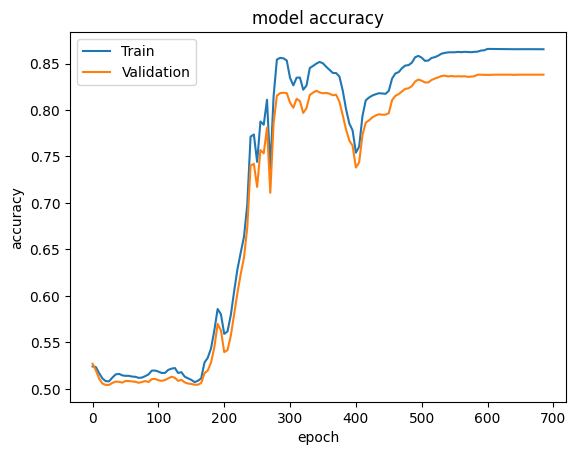

In [ ]:
plt.plot(epochs, acc_loss_dict['train_accuracy'])
plt.plot(epochs, acc_loss_dict['test_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

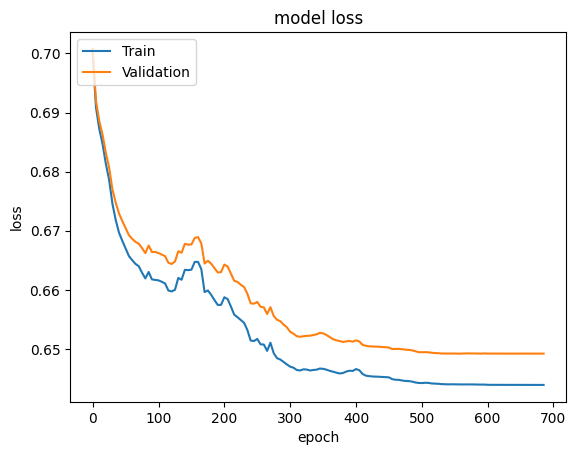

In [ ]:
# summarize history for loss
plt.plot(epochs, acc_loss_dict['train_loss'])
plt.plot(epochs, acc_loss_dict['test_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()